# Importing libraries

In the first step, we import all the required libraries for our project.

In [1]:
# In this step, we are importing all the requred dependencies.
import numpy as np # for working with arrays
import pandas as pd # for data processing
import matplotlib.pyplot as plt # for visualization
import tensorflow as tf  # for providing a wide range of functionalities and tools that would enable us to build and train complex deep learning models
import seaborn as sns # for visualization and perform exploratory analysis

from termcolor import colored as cl # for text customization

import warnings

# Suppressing all warnings
warnings.filterwarnings("ignore")

We are using the publicly available dataset from Kaggle, and other open - source dataset providers leveraging synthetic generation which has been synthetically generated, calculated based on weightings from various studies and sites that currently compute the dependent variable, carbon emissions, attempting to maintain values close to reality.

In [2]:
# Loading the dataset into a Pandas dataframe
data= pd.read_csv("Carbon Emission.csv")

# Concatenating the head and tail of the dataset together for better visualisation
pd.concat([data.head(), data.tail()])


Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0      overweight  female  pescatarian            daily                  coal   
1           obese  female   vegetarian  less frequently           natural gas   
2      overweight    male     omnivore  more frequently                  wood   
3      overweight    male     omnivore      twice a day                  wood   
4           obese  female   vegetarian            daily                  coal   
9995        obese    male     omnivore      twice a day                  coal   
9996       normal  female        vegan      twice a day                  coal   
9997   overweight  female   vegetarian            daily           electricity   
9998  underweight    male        vegan  more frequently                  coal   
9999        obese    male  pescatarian      twice a day                  wood   

         Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
0           public          NaN           often                   230   
1     walk/bicycle          NaN           often                   114   
2          private       petrol           never                   138   
3     walk/bicycle          NaN       sometimes                   157   
4          private       diesel           often                   266   
9995       private       hybrid       sometimes                   230   
9996       private          lpg           never                   234   
9997  walk/bicycle          NaN       sometimes                   298   
9998       private       petrol           often                   179   
9999       private     electric       sometimes                   115   

     Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
0                       frequently                          210   
1                           rarely                            9   
2                            never                         2472   
3                           rarely                           74   
4                  very frequently                         8457   
9995                         never                          268   
9996                    frequently                         5316   
9997               very frequently                           96   
9998                        rarely                         8688   
9999                         never                         9952   

     Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
0             large                       4                          7   
1       extra large                       3                          9   
2             small                       1                         14   
3            medium                       3                         20   
4             large                       1                          3   
9995         medium                       5                         12   
9996    extra large                       3                         14   
9997    extra large                       5                         11   
9998         medium                       5                         19   
9999          small                       4                         11   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
0                               26                             1   
1                               38                             5   
2                               47                             6   
3                                5                             7   
4                                5                             6   
9995                            27                             9   
9996                             8                            24   
9997                             5                            24   
9998                            14                             5   
9999                             6                             0   

     Energ

Here, we have finished with loading the dataset with 10,000 datapoints, with 11 categorical and 5 numerical columns.



# Preprocessing Visualisations

## Explanatory Data Analysis

Here, we first have a first-hand glance at the type of columns in the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

Here, we can see that whoever doesn't drive a vehicle has NaN values. We will fix these later.



In [ ]:
# Here, we analyse the mean and the minimum and maximum values for the columns.
data.describe()


Monthly Grocery Bill  Vehicle Monthly Distance Km  \
count          10000.000000                 10000.000000   
mean             173.875200                  2031.485900   
std               72.234018                  2769.715597   
min               50.000000                     0.000000   
25%              111.000000                    69.000000   
50%              173.000000                   823.000000   
75%              237.000000                  2516.750000   
max              299.000000                  9999.000000   

       Waste Bag Weekly Count  How Long TV PC Daily Hour  \
count            10000.000000               10000.000000   
mean                 4.024600                  12.139200   
std                  1.990375                   7.106369   
min                  1.000000                   0.000000   
25%                  2.000000                   6.000000   
50%                  4.000000                  12.000000   
75%                  6.000000                  18.000000   
max                  7.000000                  24.000000   

       How Many New Clothes Monthly  How Long Internet Daily Hour  \
count                  10000.000000                  10000.000000   
mean                      25.109000                     11.889100   
std                       14.698725                      7.277218   
min                        0.000000                      0.000000   
25%                       13.000000                      6.000000   
50%                       25.000000                     12.000000   
75%                       38.000000                     18.000000   
max                       50.000000                     24.000000   

       CarbonEmission  
count    10000.000000  
mean      2269.147300  
std       1017.675247  
min        306.000000  
25%       1538.000000  
50%       2080.000000  
75%       2768.000000  
max       8377.000000

Thus we get an overview of the summary statistics for numerical columns on our dataset.

In [3]:
# In the first step, we handle Missing Values
# For the purpose of this initial cleanup, we'll fill missing 'Vehicle Type' values with a placeholder 'unknown'
data['Vehicle Type'].fillna('unknown', inplace=True)


We replace all unknown or null values in the *Vehicle Type* column with 'unknown'.

In [ ]:
# We, confirm changes by displaying data types and checking for missing values
data.isnull().sum()

Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64

So now, we can see that our dataset currently does not have any missing values.


In [22]:
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

# Selecting columns with categorical (object) data type
categorical_columns = data.select_dtypes(include=['object']).columns

# Initializing a LabelEncoder object
label_encoder = LabelEncoder()

# Looping through each categorical column and encoding its values
for column in categorical_columns:
    # Encoding the values of the current column
    data[column] = label_encoder.fit_transform(data[column])

# Displaying the modified dataset after label encoding in a tabulated format
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))


+---+-----------+-----+------+------------------+-----------------------+-----------+--------------+-----------------+----------------------+-------------------------------+-----------------------------+----------------+------------------------+---------------------------+------------------------------+------------------------------+-------------------+-----------+--------------+----------------+
|   | Body Type | Sex | Diet | How Often Shower | Heating Energy Source | Transport | Vehicle Type | Social Activity | Monthly Grocery Bill | Frequency of Traveling by Air | Vehicle Monthly Distance Km | Waste Bag Size | Waste Bag Weekly Count | How Long TV PC Daily Hour | How Many New Clothes Monthly | How Long Internet Daily Hour | Energy efficiency | Recycling | Cooking_With | CarbonEmission |
+---+-----------+-----+------+------------------+-----------------------+-----------+--------------+-----------------+----------------------+-------------------------------+---------------------------

We're preparing the categorical data in our dataset for correlation analysis by encoding categorical variables into numerical labels. This step is crucial because correlation calculations require numeric data. We're using the LabelEncoder from the scikit-learn library to transform each categorical column into numerical labels. Each unique category within a column is assigned a unique integer label. This transformation allows us to include categorical variables in correlation calculations and other numerical analyses.

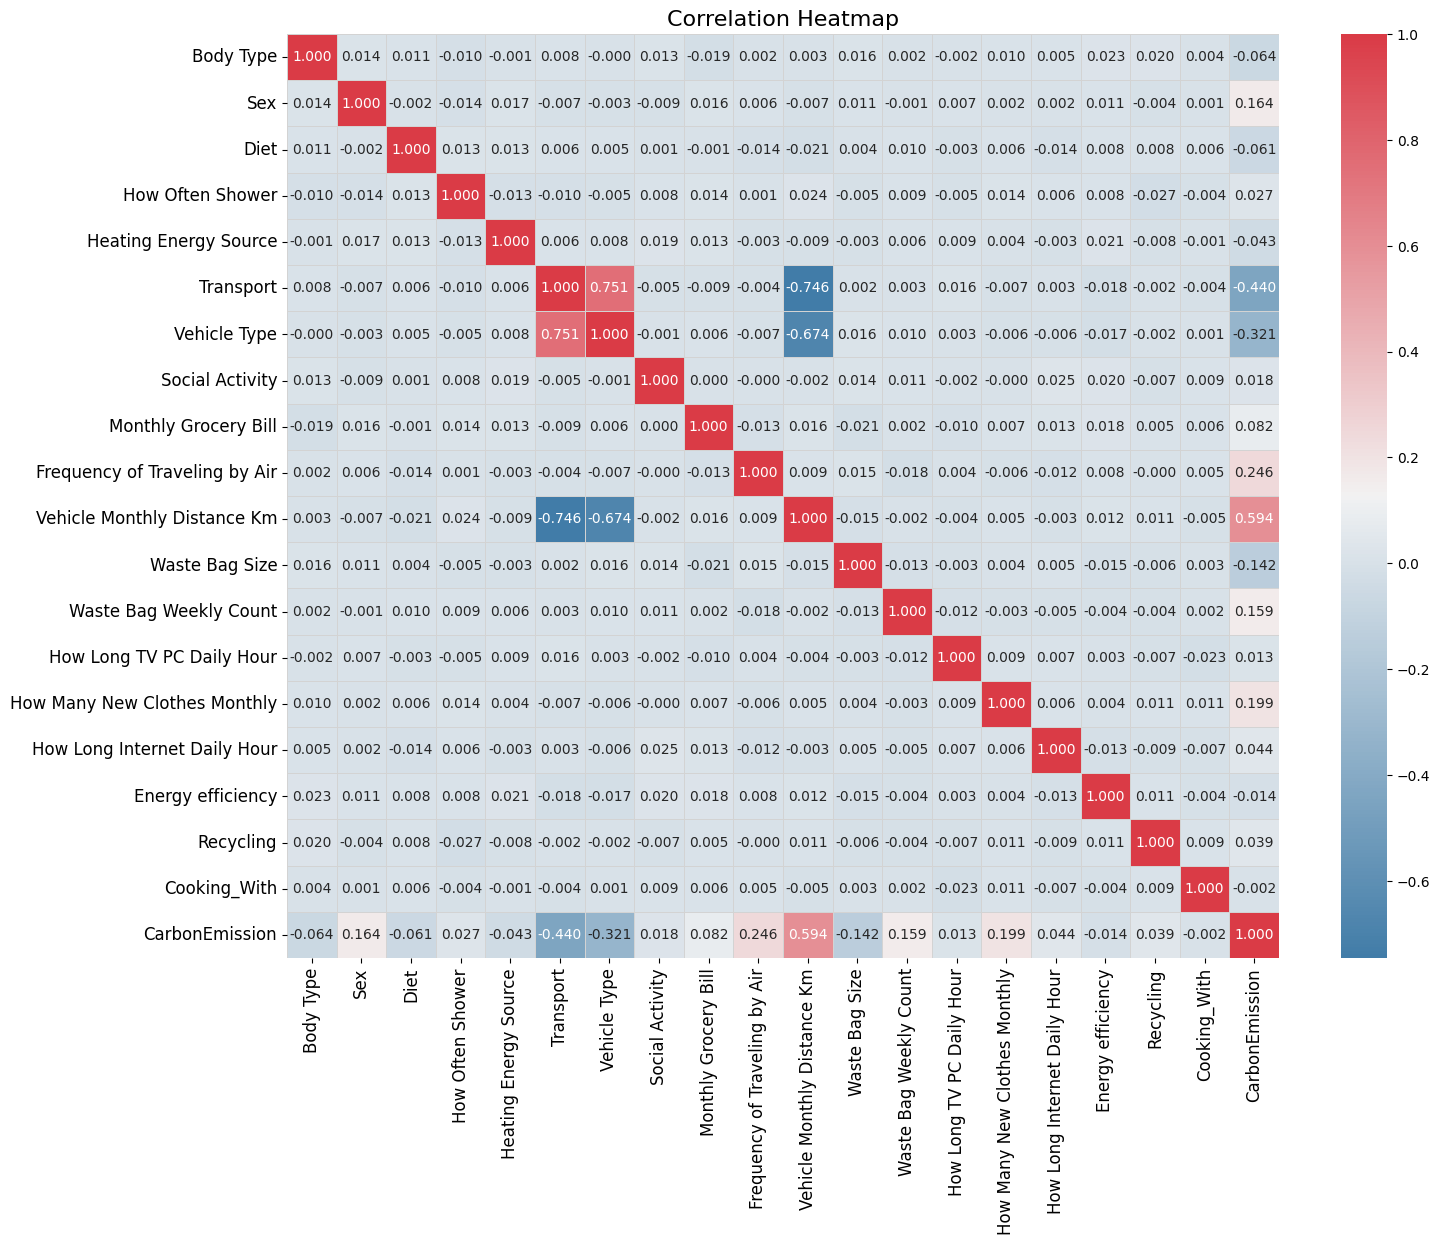

In [90]:
# Calculating Pearson correlation coefficients between numeric variables, rounding to 3 decimal places
correlations = data.corr(method='pearson').round(3)

# Define a custom colormap with soothing colors
custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap with custom styling
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap=custom_cmap, annot=True, fmt=".3f", linewidths=.5, linecolor='lightgray')
plt.title('Correlation Heatmap', fontsize=16)  # Add a title to the heatmap
plt.xticks(fontsize=12)  # Customize x-axis tick font size
plt.yticks(fontsize=12)  # Customize y-axis tick font size
plt.show()


Here, we can see a seaborn heatmap, a graphical representation of a correlation matrix representing the correlation between different variables from our dataset, using Person's Correlation Method.

# Explanatory Data Analysis

In [104]:
# Setting the aesthetic style of the plots to whitegrid for a clean appearance
sns.set_style("whitegrid")

# Creating a histogram to visualize the distribution of Carbon Emissions
plt.figure(figsize=(15, 6), dpi=200)
sns.histplot(data['CarbonEmission'], kde=True, color='blue', bins=30, orientation='horizontal')  # Plotting a histogram with kernel density estimation
plt.title('Distribution of Carbon Emissions')  # Adding a title to the plot
plt.xlabel('Carbon Emission (in MTCO2e)')  # Labeling the x-axis
plt.ylabel('Frequency')  # Labeling the y-axis
plt.show()  # Displaying the plot


The histogram shown above reveals that most individuals have a carbon footprint falling within the range of approximately 1000 to 2000 metric tonnes per year. This indicates a prevalent range for carbon emissions among the sampled population.

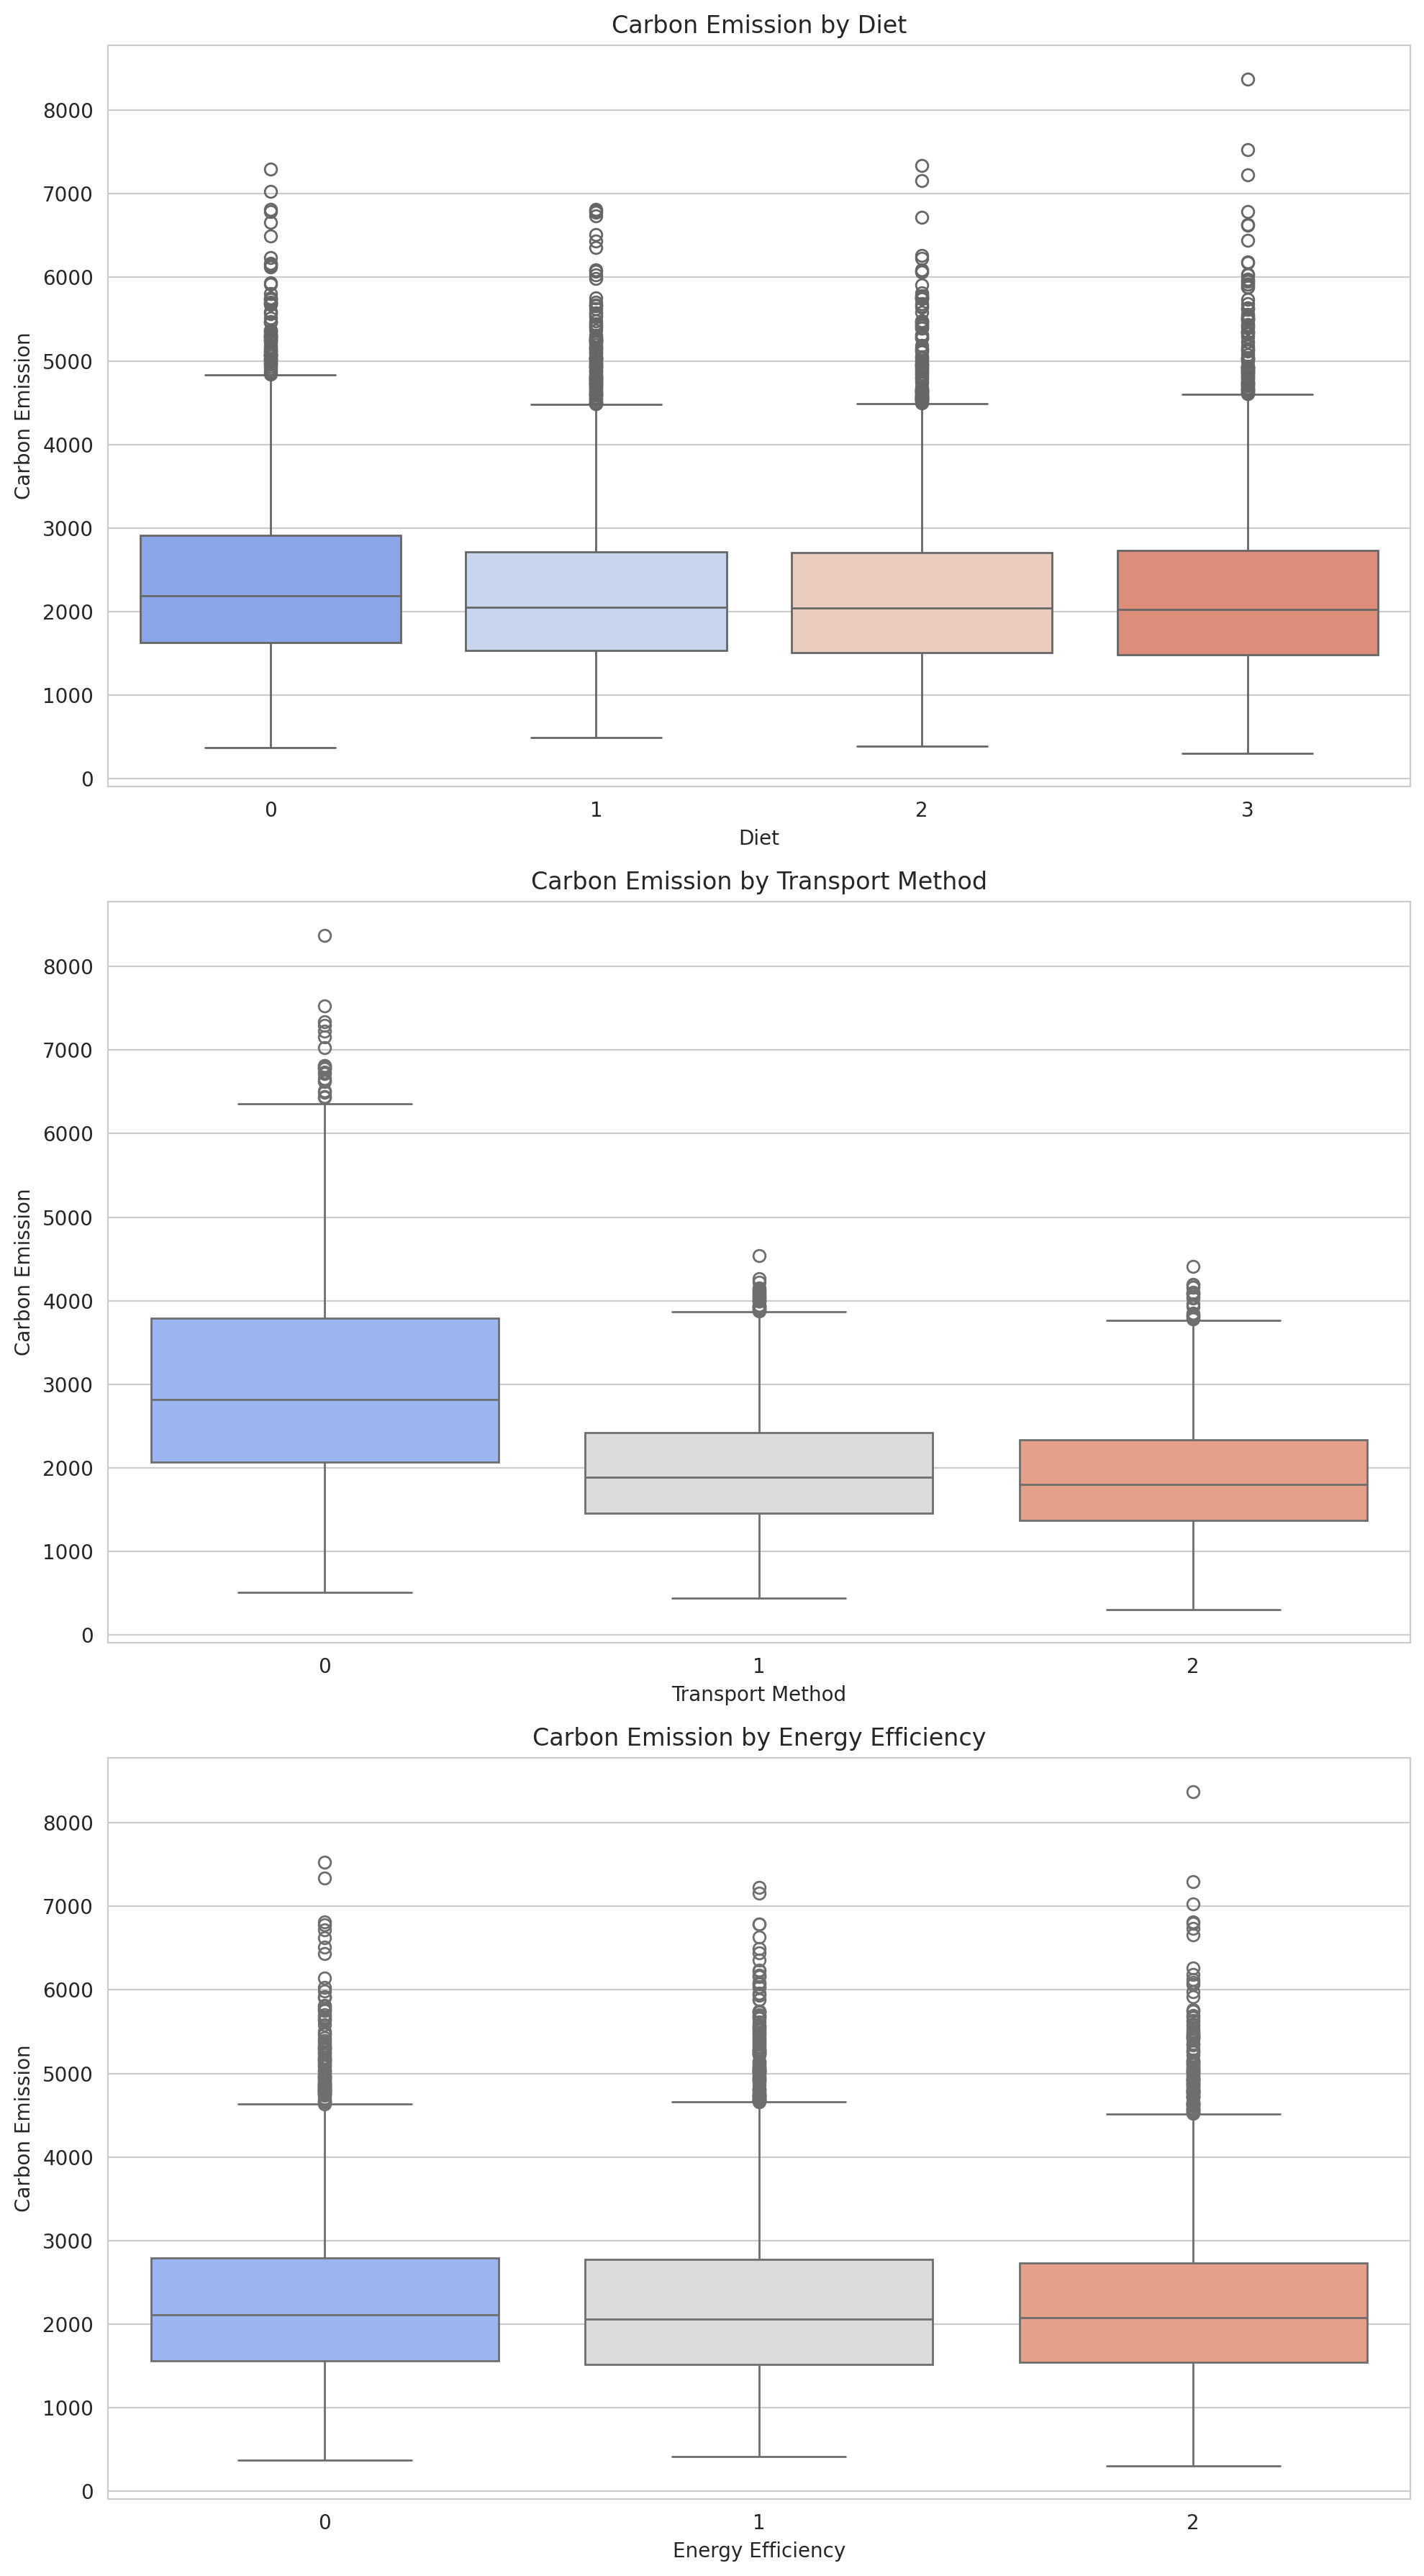

In [ ]:
# Creating box plots to visualize carbon emissions across different categories
fig, axes = plt.subplots(3, 1, figsize=(10, 18), dpi=200)

# Diet and Carbon Emission
sns.boxplot(ax=axes[0], x='Diet', y='CarbonEmission', data=data, palette="coolwarm")
axes[0].set_title('Carbon Emission by Diet')  # Adding a title to the plot
axes[0].set_xlabel('Diet')  # Labeling the x-axis
axes[0].set_ylabel('Carbon Emission')  # Labeling the y-axis

# Transport and Carbon Emission
sns.boxplot(ax=axes[1], x='Transport', y='CarbonEmission', data=data, palette="coolwarm")
axes[1].set_title('Carbon Emission by Transport Method')  # Adding a title to the plot
axes[1].set_xlabel('Transport Method')  # Labeling the x-axis
axes[1].set_ylabel('Carbon Emission')  # Labeling the y-axis

# Energy Efficiency and Carbon Emission
sns.boxplot(ax=axes[2], x='Energy efficiency', y='CarbonEmission', data=data, palette="coolwarm")
axes[2].set_title('Carbon Emission by Energy Efficiency')  # Adding a title to the plot
axes[2].set_xlabel('Energy Efficiency')  # Labeling the x-axis
axes[2].set_ylabel('Carbon Emission')  # Labeling the y-axis

plt.tight_layout()  # Adjusting layout to prevent overlap of subplots
plt.show()  # Displaying the plots


The box plots shown above, have been generated to visualize carbon emissions across different categories: Diet, Transport Method, and Energy Efficiency. From the plots, it's evident that individuals following an omnivorous diet tend to have higher carbon emissions compared to other diet categories. Similarly, those reliant on private transport exhibit higher emissions, likely due to increased fuel consumption compared to public transport or walking/cycling options. Additionally, while higher energy efficiency is generally associated with lower emissions, anomalies may occur where improved efficiency inadvertently leads to a higher percentage of carbon emissions.

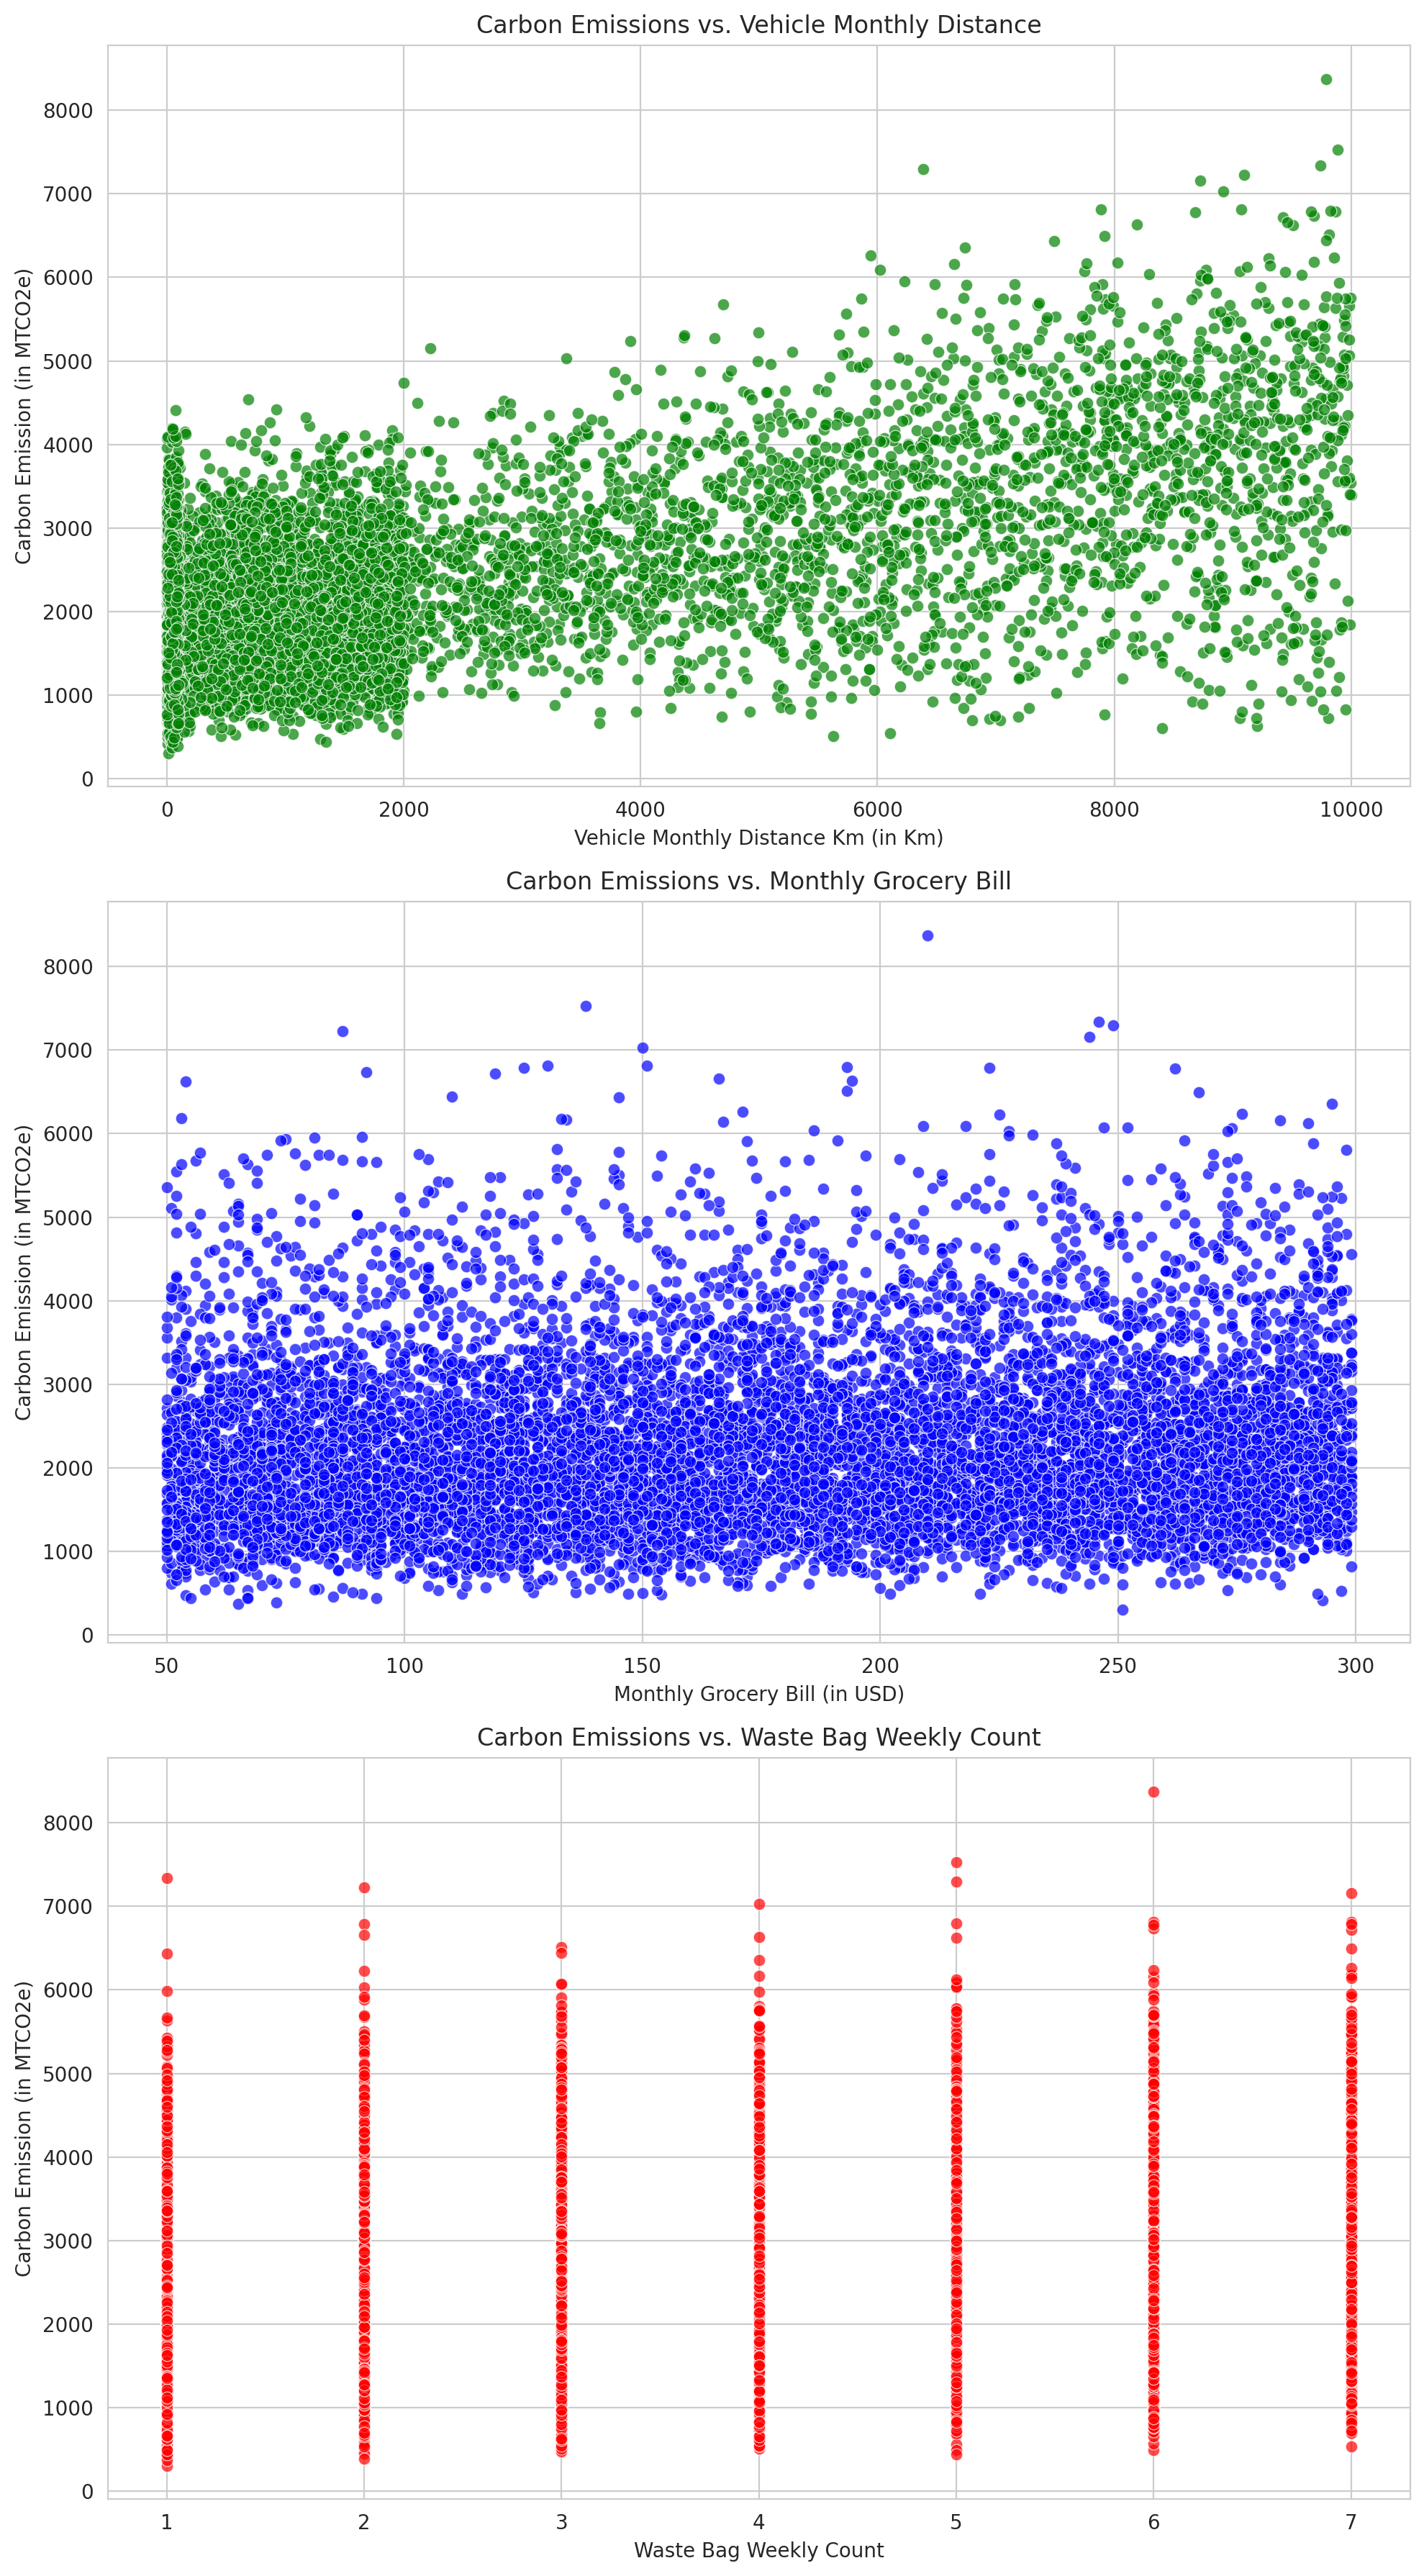

In [ ]:
# Creating scatter plots to visualize selected variable pairs
fig, axes = plt.subplots(3, 1, figsize=(10, 18), dpi=200)

# Carbon Emissions vs. Vehicle Monthly Distance
sns.scatterplot(ax=axes[0], x='Vehicle Monthly Distance Km', y='CarbonEmission', data=data, color='green', alpha=0.7)  # Adding transparency to points
axes[0].set_title('Carbon Emissions vs. Vehicle Monthly Distance')  # Adding a title to the plot
axes[0].set_xlabel('Vehicle Monthly Distance Km (in Km)')  # Labeling the x-axis
axes[0].set_ylabel('Carbon Emission (in MTCO2e)')  # Labeling the y-axis

# Carbon Emissions vs. Monthly Grocery Bill
sns.scatterplot(ax=axes[1], x='Monthly Grocery Bill', y='CarbonEmission', data=data, color='blue', alpha=0.7)  # Adding transparency to points
axes[1].set_title('Carbon Emissions vs. Monthly Grocery Bill')  # Adding a title to the plot
axes[1].set_xlabel('Monthly Grocery Bill (in USD)')  # Labeling the x-axis
axes[1].set_ylabel('Carbon Emission (in MTCO2e)')  # Labeling the y-axis

# Carbon Emissions vs. Waste Bag Weekly Count
sns.scatterplot(ax=axes[2], x='Waste Bag Weekly Count', y='CarbonEmission', data=data, color='red', alpha=0.7)  # Adding transparency to points
axes[2].set_title('Carbon Emissions vs. Waste Bag Weekly Count')  # Adding a title to the plot
axes[2].set_xlabel('Waste Bag Weekly Count')  # Labeling the x-axis
axes[2].set_ylabel('Carbon Emission (in MTCO2e)')  # Labeling the y-axis

plt.tight_layout()  # Adjusting layout to prevent overlap of subplots
plt.show()  # Displaying the plots


The scatter plots visualize the relationships between carbon emissions and three factors: monthly vehicle distance, monthly grocery bill, and weekly waste bag count. Notably, when monthly vehicle distance exceeds 10,000 km, carbon emissions tend to rise to approximately 8000 MTCO2e. However, in most cases, monthly travel distances remain within the range of 2000 to 3000 km.

Regarding monthly grocery bills (in USD), a uniform level of carbon emissions is observed across various bill ranges. Similarly, a consistent emission level of approximately 6000 to 7000 MTCO2e is noted across weekly waste bag counts from 1 to 7.

**Social Activity**

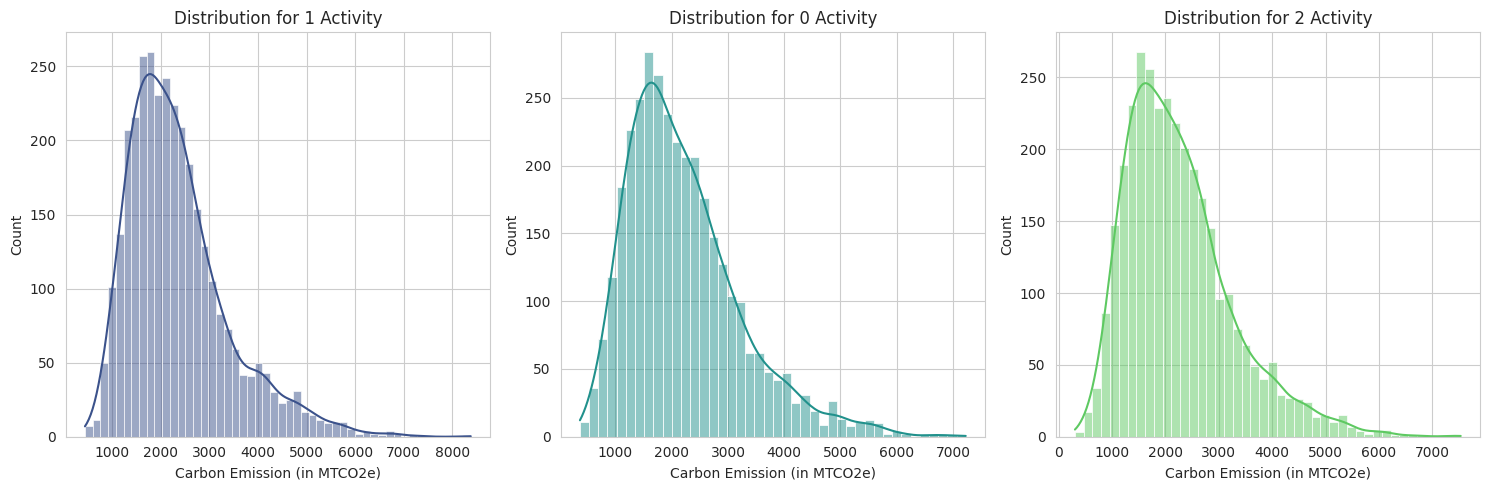

In [103]:
# Extracting unique social activities and generating a color palette
unique_social_activity = data['Social Activity'].unique()
palette = sns.color_palette("viridis", len(unique_social_activity))

# Creating subplots to display histograms for each social activity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterating over each unique social activity and plotting its histogram
for i, activity in enumerate(unique_social_activity):
    ax = axes[i]  # Selecting the current subplot
    activity_df = data[data['Social Activity'] == activity]  # Filtering data for the current activity
    sns.histplot(data=activity_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)  # Plotting histogram
    ax.set_title(f"Distribution for {activity} Activity")  # Adding title to subplot
    ax.set_xlabel('Carbon Emission (in MTCO2e)')  # Labeling the x-axis


plt.tight_layout()  # Adjusting layout to prevent overlap of subplots
plt.show()  # Displaying the plots


The graphs above depict carbon emissions (in MTCO2e) resulting from social activities, categorized by the frequency of engagement: often, never, and sometimes.

In the first scenario, a trend emerges where higher participation in social activities correlates with lower total carbon emissions. Specifically, when a larger number of individuals are often involved in social activities (around 150 to 250 individuals), the total emissions range between 1000 to 3000 MTCO2e.

Conversely, in the second scenario, individuals who never engage in social activities tend to exhibit higher carbon emissions.

Finally, the third scenario mirrors the first, indicating that individuals who sometimes engage in social activities contribute to lower carbon emissions, possibly suggesting a balance between social engagement and environmental impact in their lives.

**Frequency of Traveling by Air**

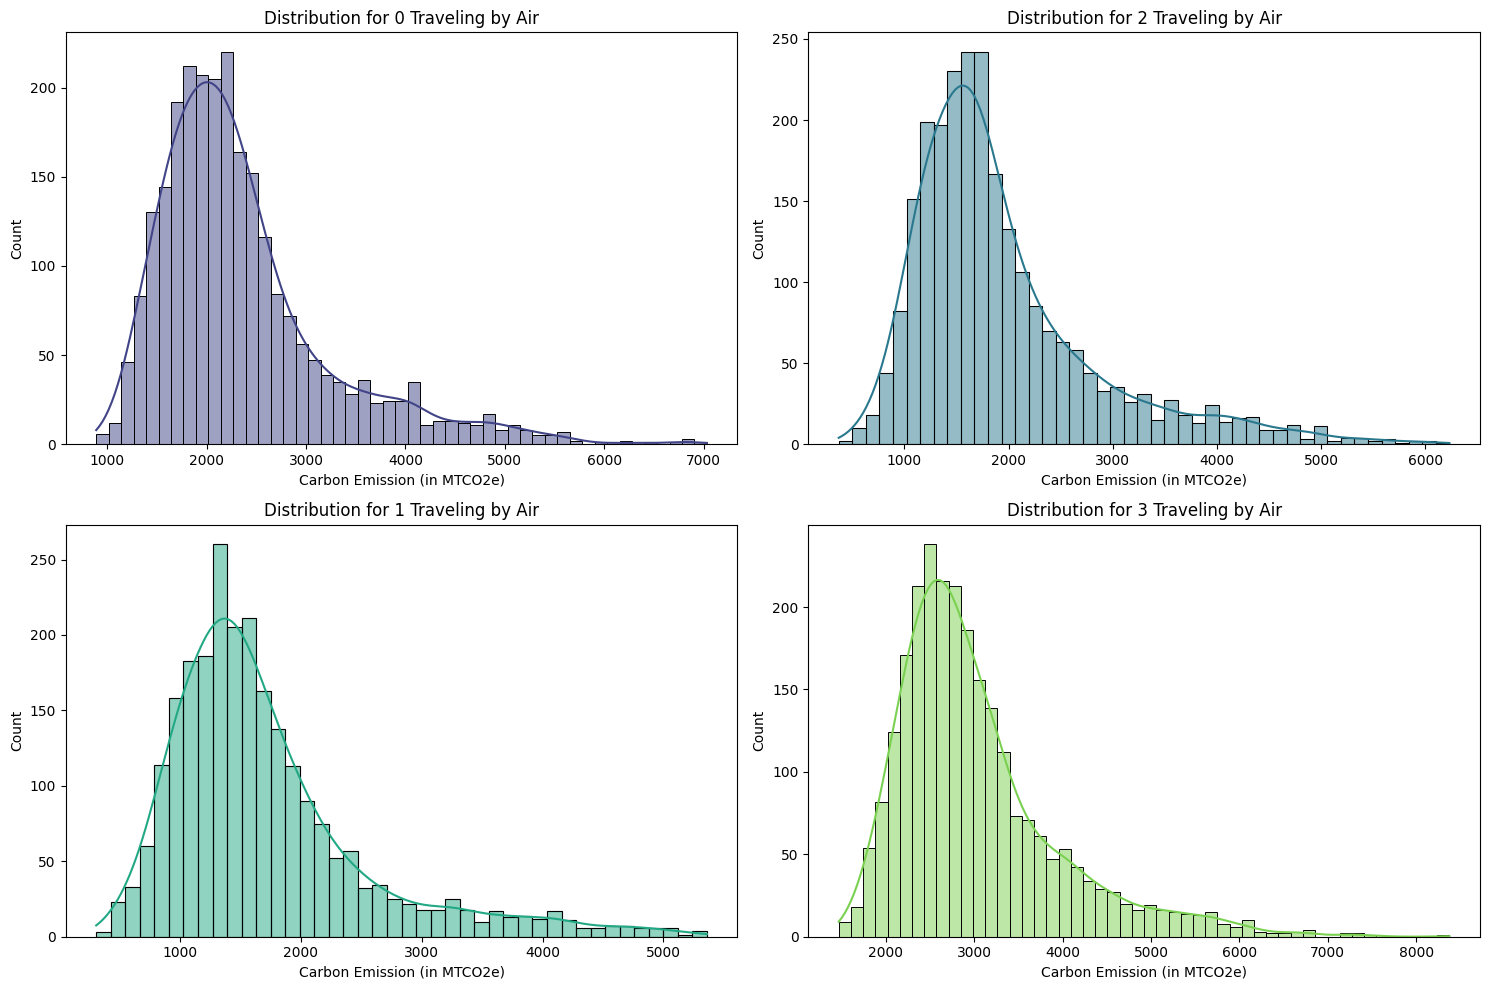

In [ ]:
# Extracting unique frequencies of traveling by air and generating a color palette
unique_frequency_of_traveling_by_air = data['Frequency of Traveling by Air'].unique()
palette = sns.color_palette("viridis", len(unique_frequency_of_traveling_by_air))

# Creating subplots to display histograms for each frequency of traveling by air
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterating over each unique frequency of traveling by air and plotting its histogram
for i, frequency_of_traveling_by_air in enumerate(unique_frequency_of_traveling_by_air):
    ax = axes[i//2, i%2]  # Selecting the current subplot
    diet_df = data[data['Frequency of Traveling by Air'] == frequency_of_traveling_by_air]  # Filtering data for the current frequency of traveling by air
    sns.histplot(data=diet_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)  # Plotting histogram
    ax.set_title(f"Distribution for {frequency_of_traveling_by_air} Traveling by Air")  # Adding title to subplot
    ax.set_xlabel('Carbon Emission (in MTCO2e)')  # Labeling the x-axis

plt.tight_layout()  # Adjusting layout to prevent overlap of subplots
plt.show()  # Displaying the plots


The above histograms depict carbon emissions based on the frequency of air travel, with each frequency category represented by a distinct color palette and organized in a 2x2 grid of subplots.

In the first case (frequent air travelers), individuals who frequently travel by air, with a count of around 150 to 200, emit carbon in the range of approximately 1500 to 2500 MTCO2e.

Moving to the second case (rare air travelers), those who seldom travel by air emit carbon ranging from around 1000 to 2000 MTCO2e, with a majority count of around 150 to 200, followed by a steep decline in emissions.

For individuals who never travel by air (third case), carbon emissions range from approximately 1000 to 2300 MTCO2e, with a majority count of around 150 to 200 individuals.

Finally, in the fourth case (very frequent air travelers), individuals who travel by air very frequently emit carbon in the range of around 2300 to 3500 MTCO2e, with a majority count of around 150 to 200.

**Transport**

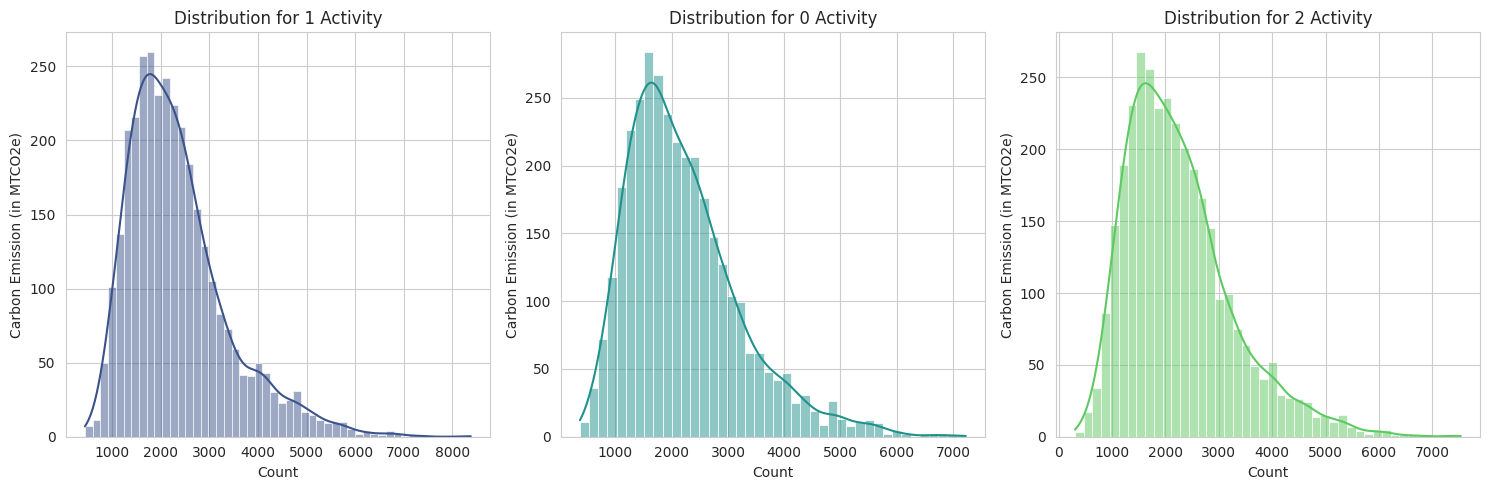

In [102]:
# Extracting unique social activities and generating a color palette
unique_social_activity = data['Social Activity'].unique()
palette = sns.color_palette("viridis", len(unique_social_activity))

# Creating subplots to display histograms for each social activity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterating over each unique social activity and plotting its histogram
for i, activity in enumerate(unique_social_activity):
    ax = axes[i]  # Selecting the current subplot
    activity_df = data[data['Social Activity'] == activity]  # Filtering data for the current activity
    sns.histplot(data=activity_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True, stat="count")  # Plotting histogram with count on y-axis
    ax.set_title(f"Distribution for {activity} Activity")  # Adding title to subplot
    ax.set_xlabel('Carbon Emission (in MTCO2e)')  # Labeling the x-axis
    ax.set_ylabel('Count')  # Labeling the y-axis as count

plt.tight_layout()  # Adjusting layout to prevent overlap of subplots
plt.show()  # Displaying the plots


These histograms illustrate carbon emissions based on different modes of transportation, each plotted with a distinct color palette and displayed in a row of subplots.

In the first case (public transport), individuals using public transportation emit carbon ranging from around 1300 to 2800 MTCO2e, with a count of approximately 150 to 200.

Moving to the second case (transportation by walking or bicycling), individuals who opt for these modes emit carbon in the range of approximately 1200 to 2200 MTCO2e, with a similar count of around 150 to 200.

Finally, in the third case (private transport), individuals using private transportation emit carbon ranging from around 1800 to 4500 MTCO2e, with a count of approximately 150 to 200.

**Body Type**

In [ ]:
# Extracting unique body types and generating a color palette
unique_body_type = data['Body Type'].unique()
palette = sns.color_palette("viridis", len(unique_body_type))

# Creating subplots to display histograms for each body type
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterating over each unique body type and plotting its histogram
for i, body_type in enumerate(unique_body_type):
    ax = axes[i//2, i%2]
    body_type_df = data[data['Body Type'] == body_type]  # Filtering data for the current body type
    sns.histplot(data=body_type_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)  # Plotting histogram
    ax.set_title(f"Distribution for {body_type} Body Type")  # Adding title to subplot
    ax.set_xlabel('Carbon Emission (in MTCO2e)')  # Labeling the x-axis

plt.tight_layout()  # Adjusting layout to prevent overlap of subplots
plt.show()  # Displaying the plots


These histograms depict carbon emissions based on different body types, with each type represented by a distinct color palette and arranged in a 2x2 grid of subplots.

In the first case (overweight body type), individuals with this body type emit carbon ranging from 1200 to 3000 MTCO2e, with a count of around 150 to 200.

Moving to the second case (obese body type), individuals in this category emit carbon in the range of approximately 1500 to 3000 MTCO2e, with a similar count of around 150 to 200.

In the third case (underweight body type), individuals with this body type emit carbon ranging from around 1300 to 2500 MTCO2e, with a count of around 150 to 200.

Finally, in the fourth case (normal body type), individuals with this body type emit carbon in the range of around 1400 to 2800 MTCO2e, with a count of around 150 to 200.

In [ ]:
# Grouping the data by body type and calculating mode, mean, and median of carbon emissions
grouped = data.groupby('Body Type')['CarbonEmission'].agg([
    lambda x: x.mode()[0] if not x.mode().empty else None,  # Mode
    'mean',  # Mean
    'median'  # Median
])

# Renaming columns for clarity
grouped.columns = ['Mode', 'Mean', 'Median']

# Displaying the grouped statistics
print(grouped)


           Mode         Mean  Median
Body Type                           
0          1323  2140.509503  1972.0
1          1616  2561.212000  2360.0
2          2158  2358.919984  2161.0
3          1279  2019.027165  1868.0


**Further EDA**

In [ ]:
# Selecting numerical features (int64 type) from the dataset and extracting their column names
numerical_features = data.select_dtypes(include=['int64']).columns

# Selecting categorical features (object type) from the dataset and extracting their column names
categorical_features = data.select_dtypes(include=['object']).columns

# Printing the list of numerical features
print("Numerical features:")
print(numerical_features)

# Printing the list of categorical features
print("Categorical features:")
print(categorical_features)


Numerical features: 
Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')
Categorical features: 
Index([], dtype='object')


We separate out the numerical features and the categorical features for further Explanatory Data Analysis.

In [ ]:
# Pie Chart of Carbon Emission by Categorical Features
figures = []  # List to store figures

for feature in categorical_features:
    # Grouping the data by the current categorical feature and calculating the sum of carbon emissions
    grouped_data = data.groupby(feature)['Carbonmission'].sum()

    # Creating a new figure for each feature
    fig = plt.figure(figsize=(8, 8))

    # Plotting the pie chart
    plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)

    # Adding title to the pie chart
    plt.title('Pie Chart of Carbon Emission by ' + feature)

    # Ensuring the pie chart is circular
    plt.axis('equal')

    # Storing the figure in the list
    figures.append(fig)

# Displaying all the pie charts
for fig in figures:
    plt.show(fig)


In [ ]:
# Boxplot of Carbon Emission by Categorical Features
for feature in categorical_features:
    # Creating a new figure for each feature
    plt.figure(figsize=(12, 6))

    # Creating a boxplot with seaborn
    sns.boxplot(data=data, x=feature, y='carbonemission')

    # Adding title to the boxplot
    plt.title(f'Boxplot of {feature} vs Carbon Emission')

    # Labeling x-axis and y-axis
    plt.xlabel(feature)
    plt.ylabel('Carbon Emission')

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)

    # Displaying the boxplot
    plt.show()


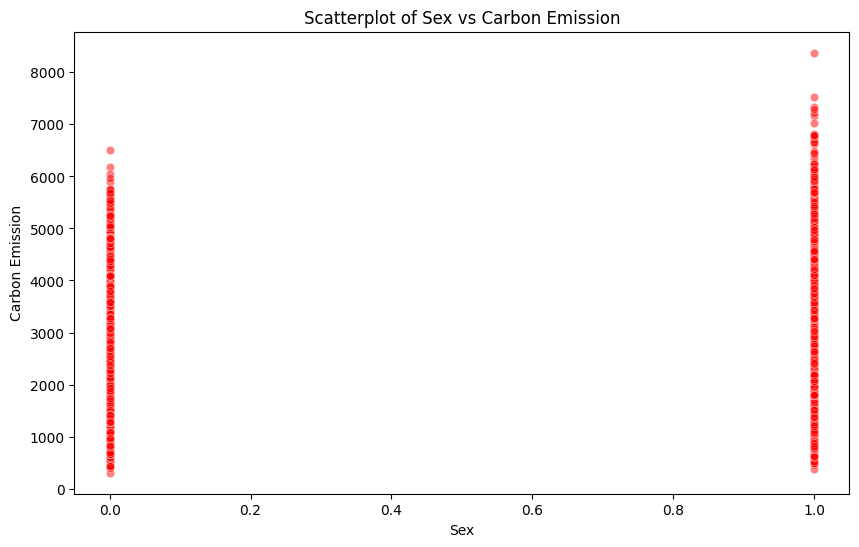

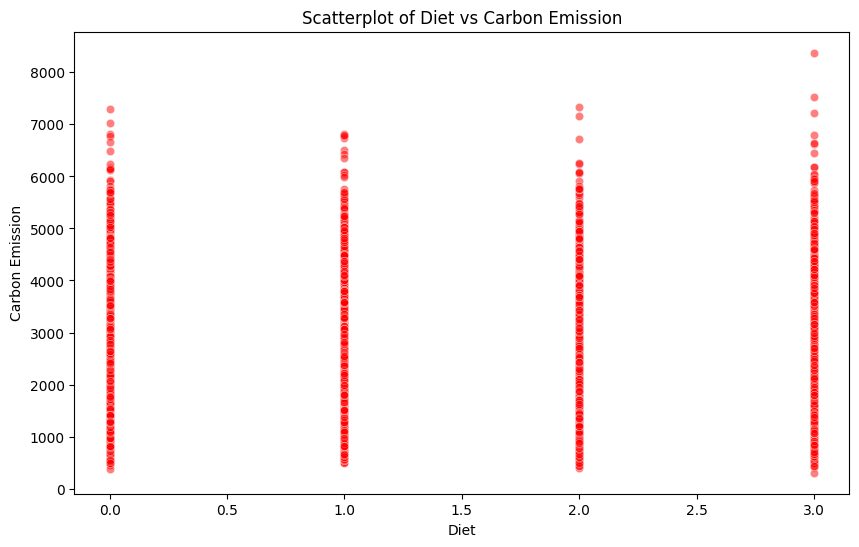

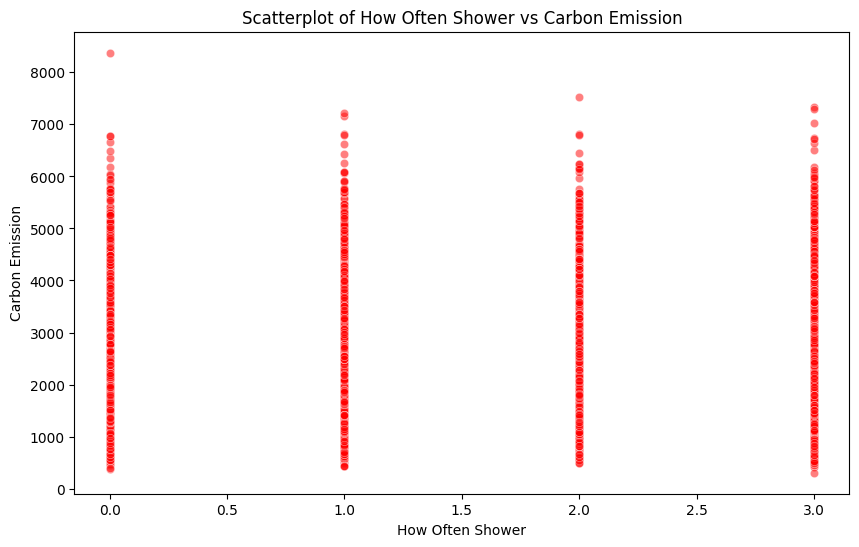

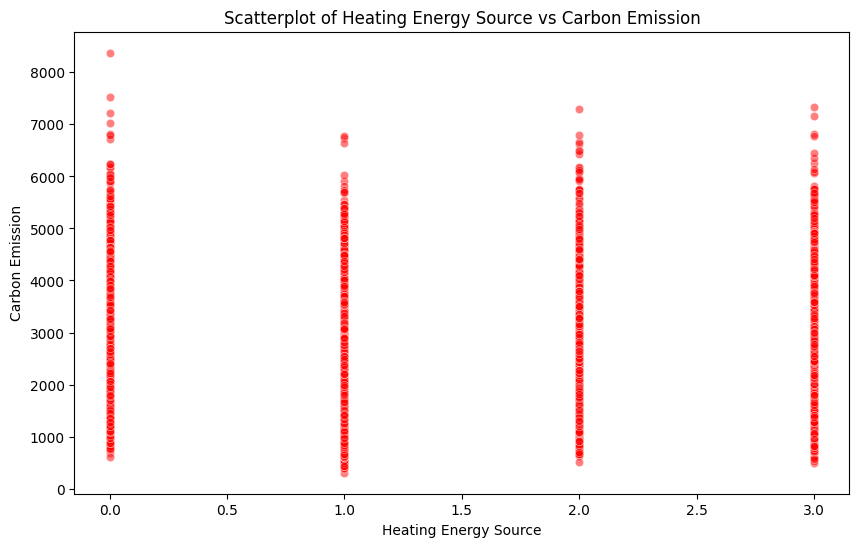

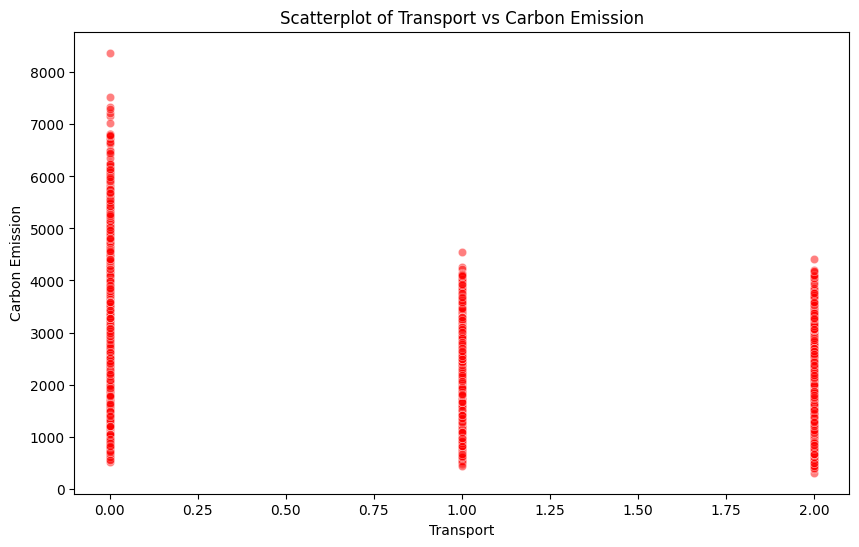

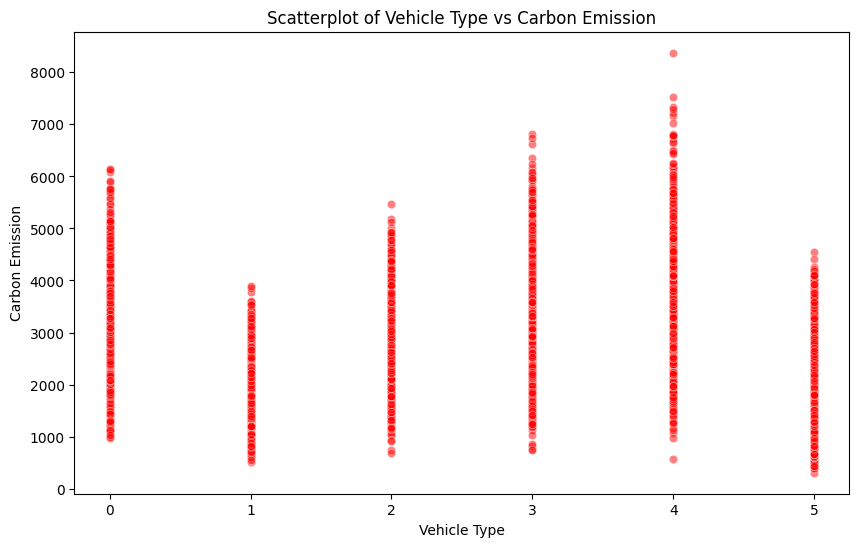

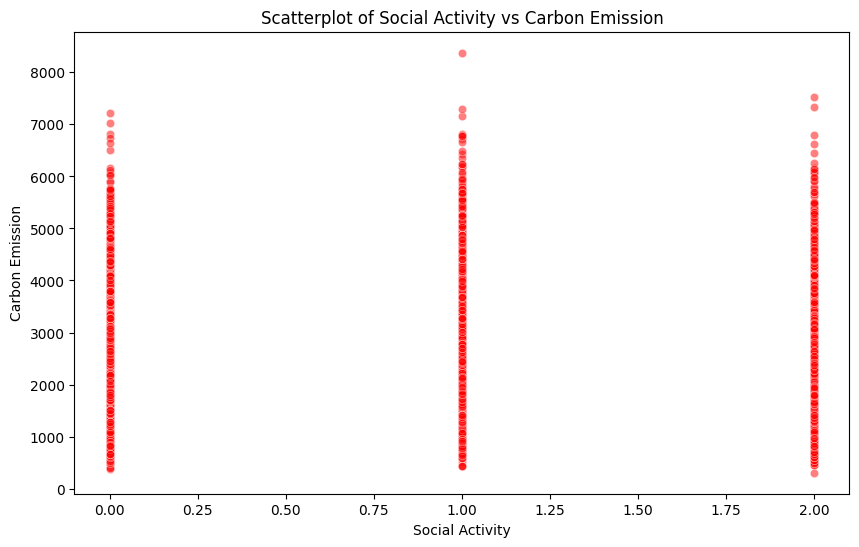

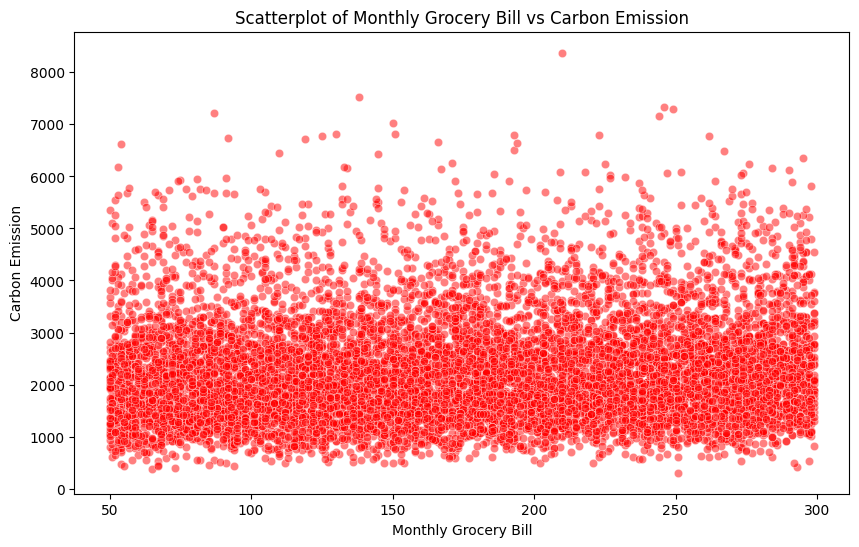

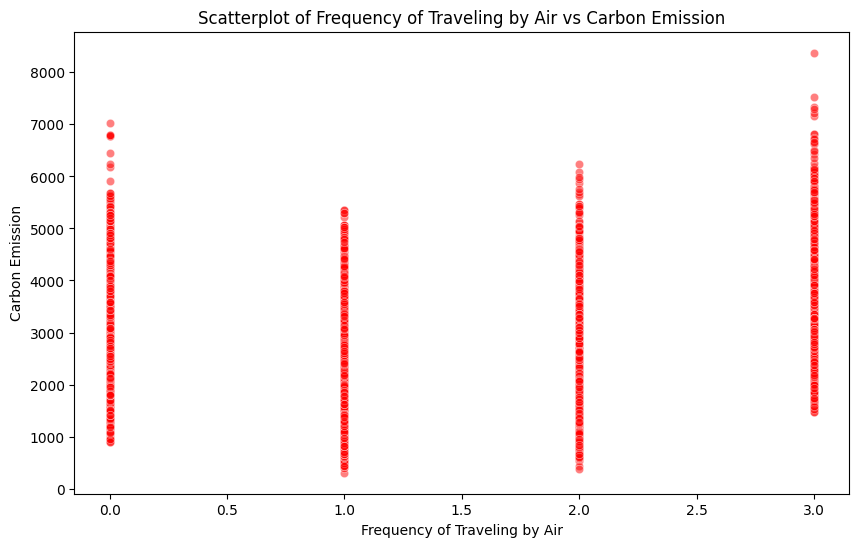

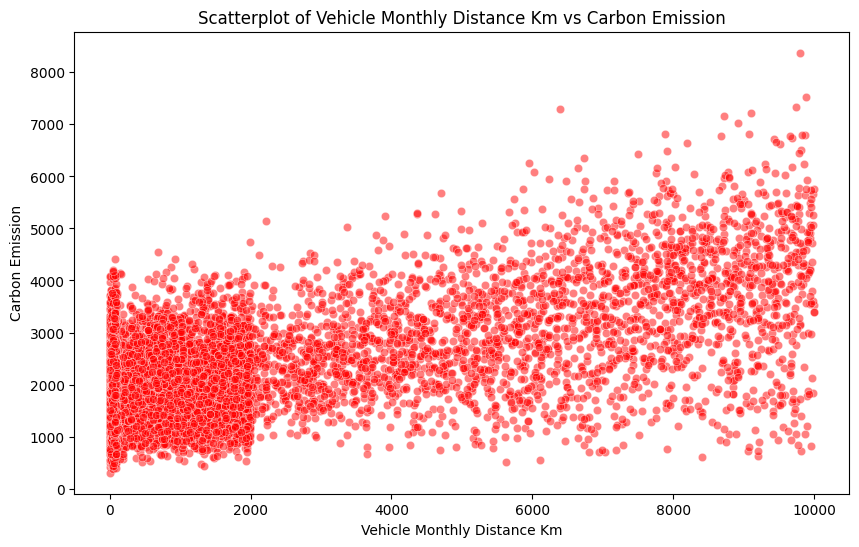

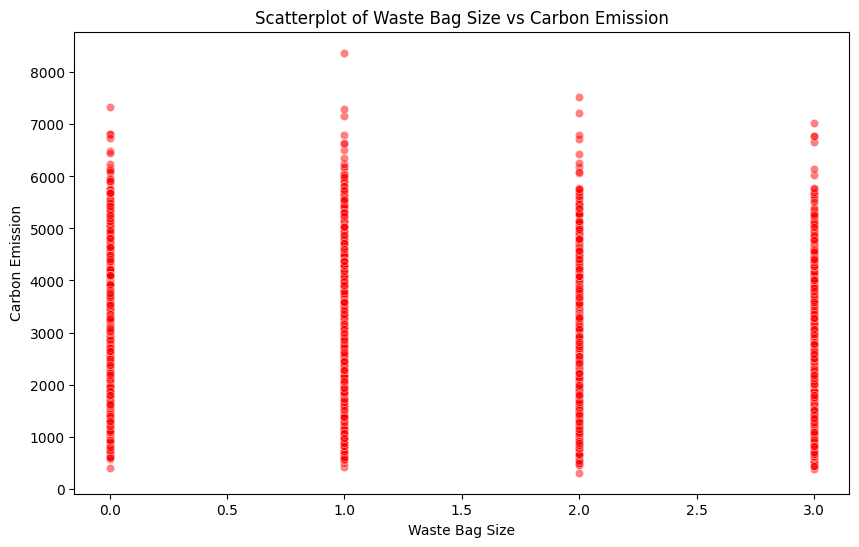

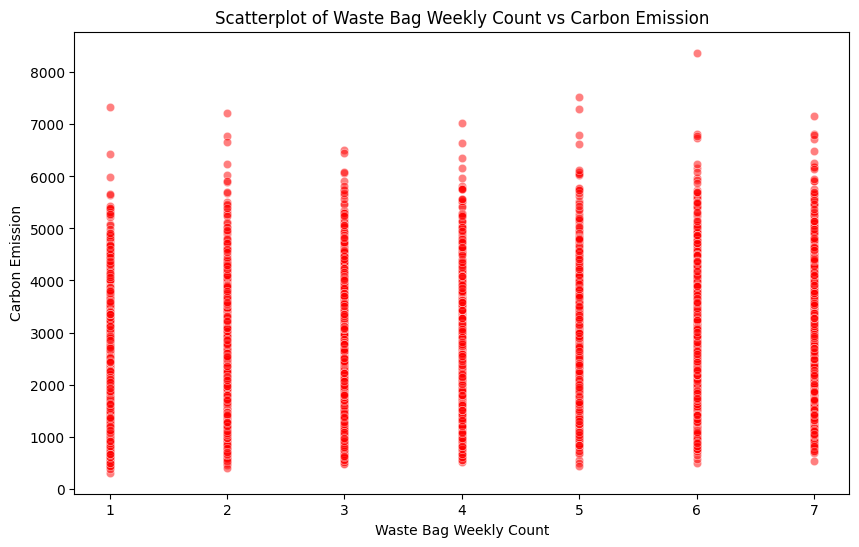

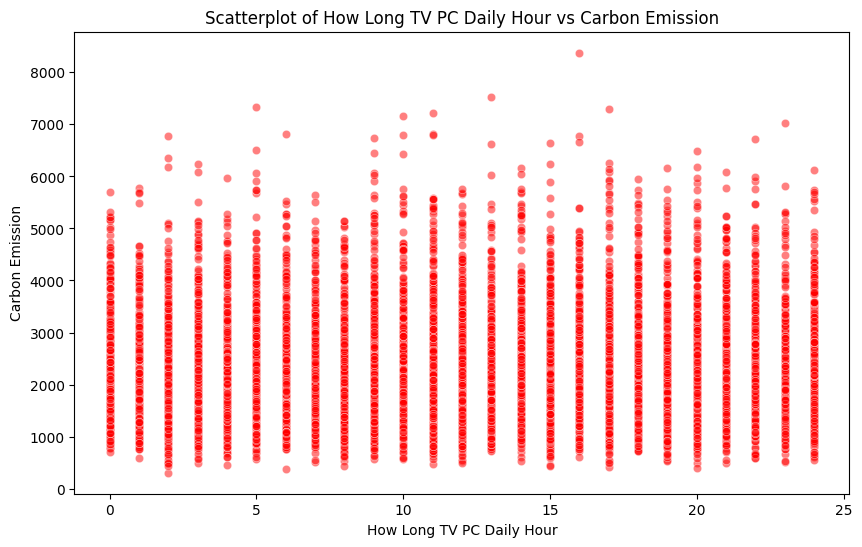

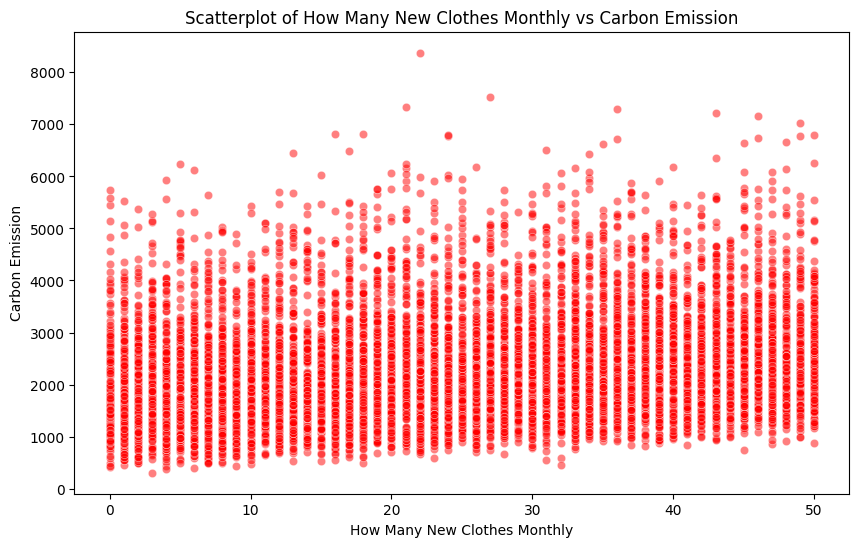

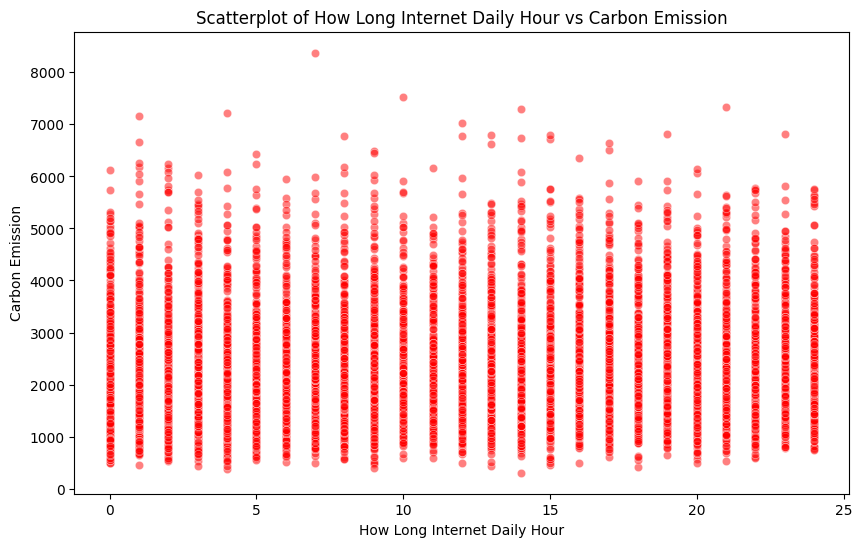

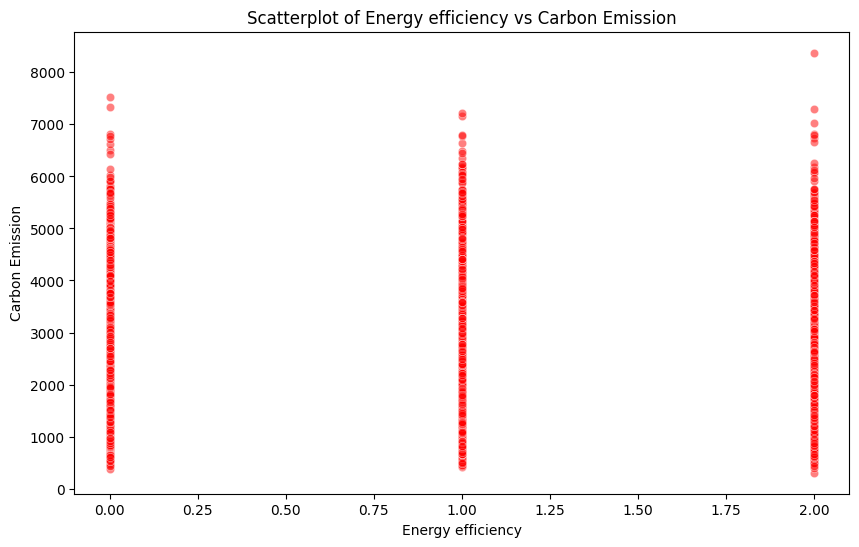

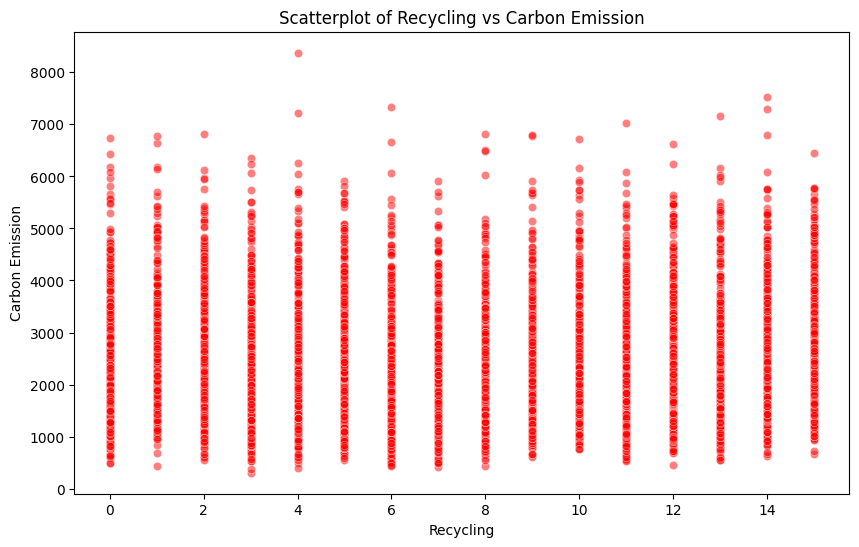

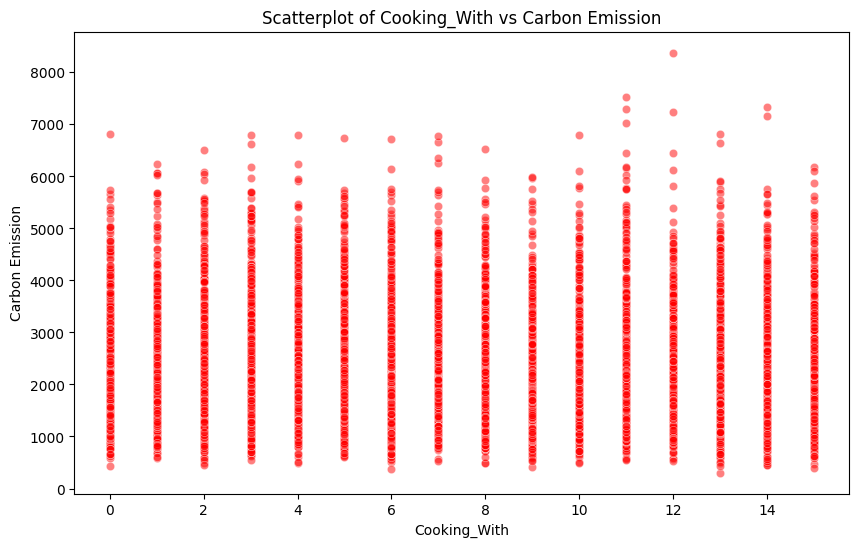

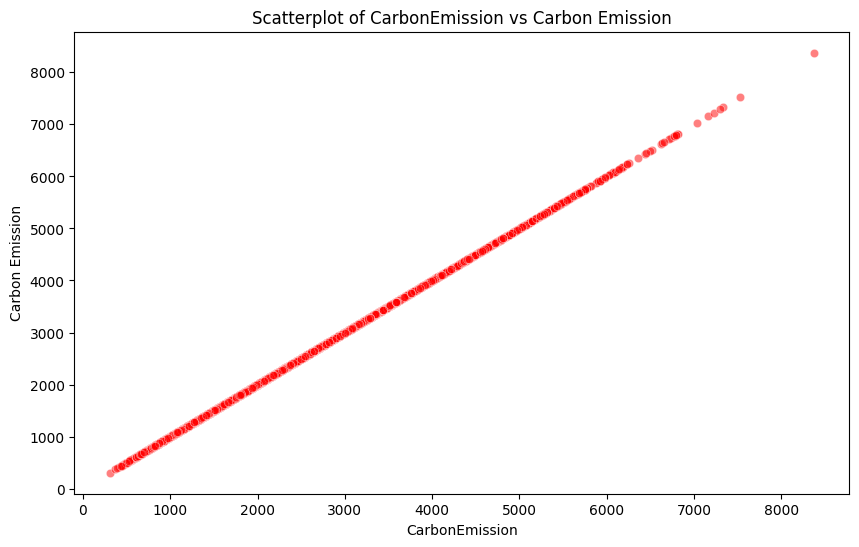

In [ ]:
# Scatterplot of Carbon Emission by Numerical Features
for feature in numerical_features:
    # Creating a new figure for each feature
    plt.figure(figsize=(10, 6))

    # Creating a scatterplot with seaborn
    sns.scatterplot(data=data, x=feature, y='CarbonEmission', alpha=0.5, color='red')

    # Adding title to the scatterplot
    plt.title(f'Scatterplot of {feature} vs Carbon Emission')

    # Labeling x-axis and y-axis
    plt.xlabel(feature)
    plt.ylabel('Carbon Emission')

    # Displaying the scatterplot
    plt.show()


# Preprocessing Data


In [ ]:
# Checking for outliers in numerical columns using Z-score method

# Define a function to detect outliers using Z-score method
def detect_outliers_zscore(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    return z_scores > threshold

# Detect outliers for numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
outliers = pd.DataFrame()

# Loop through each numerical column and detect outliers
for col in numerical_columns:
    outliers[col] = detect_outliers_zscore(data[col])

# Display columns with outliers
print("Columns with outliers:")
print(outliers.any())

# Count outliers for each column
print("\nNumber of outliers for each column:")
print(outliers.sum())


Columns with outliers:
Body Type                        False
Sex                              False
Diet                             False
How Often Shower                 False
Heating Energy Source            False
Transport                        False
Vehicle Type                     False
Social Activity                  False
Monthly Grocery Bill             False
Frequency of Traveling by Air    False
Vehicle Monthly Distance Km      False
Waste Bag Size                   False
Waste Bag Weekly Count           False
How Long TV PC Daily Hour        False
How Many New Clothes Monthly     False
How Long Internet Daily Hour     False
Energy efficiency                False
Recycling                        False
Cooking_With                     False
CarbonEmission                    True
dtype: bool

Number of outliers for each column:
Body Type                          0
Sex                                0
Diet                               0
How Often Shower                   0


We see the "CarbonEmission" column has got 127 outliers, and we will scale that in the next part. Outliers are data points that significantly differ from other observations in a dataset. They can distort statistical analyses and machine learning models by skewing results or introducing bias. Scaling is essential because it ensures that all features contribute equally to the analysis by bringing them to the same scale. This process prevents features with larger magnitudes from dominating those with smaller ones, allowing the model to learn more effectively and produce more accurate predictions. Additionally, scaling will help our regression algorithms to converge faster and improve the overall stability and performance our model.

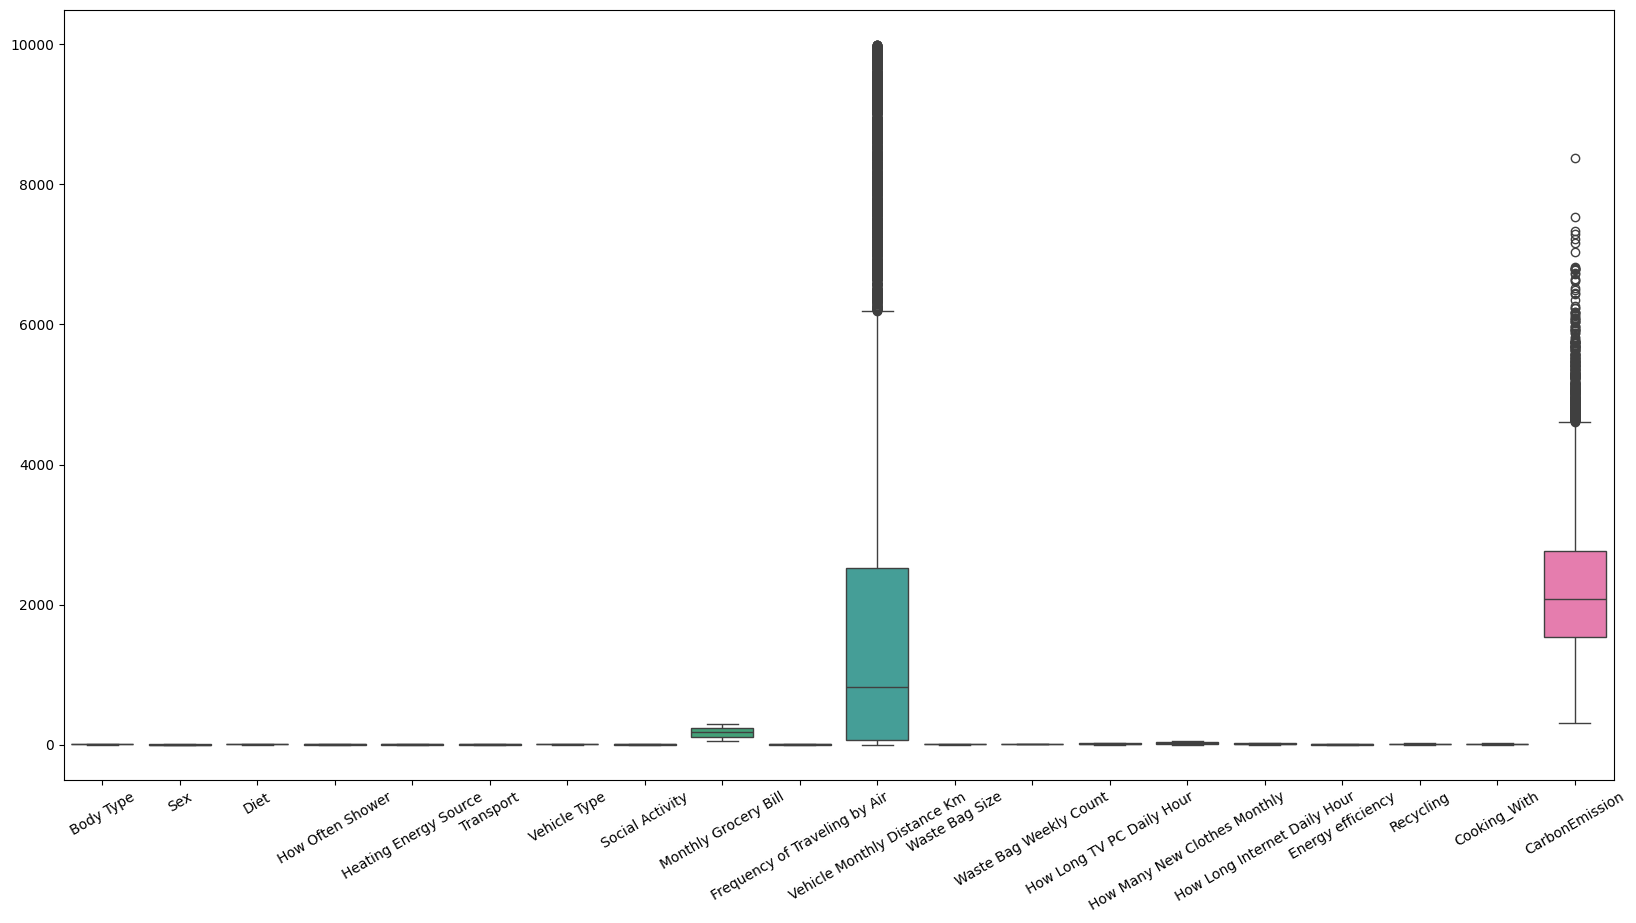

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the numerical columns for boxplot visualization
numerical_data = data.select_dtypes(include=[np.number])

# Creating a boxplot for visualizing outliers in numerical data
plt.figure(figsize=(20,10))
sns.boxplot(data=numerical_data)

# Rotating x-axis labels for better readability
plt.xticks(rotation=30)

# Displaying the boxplot
plt.show()


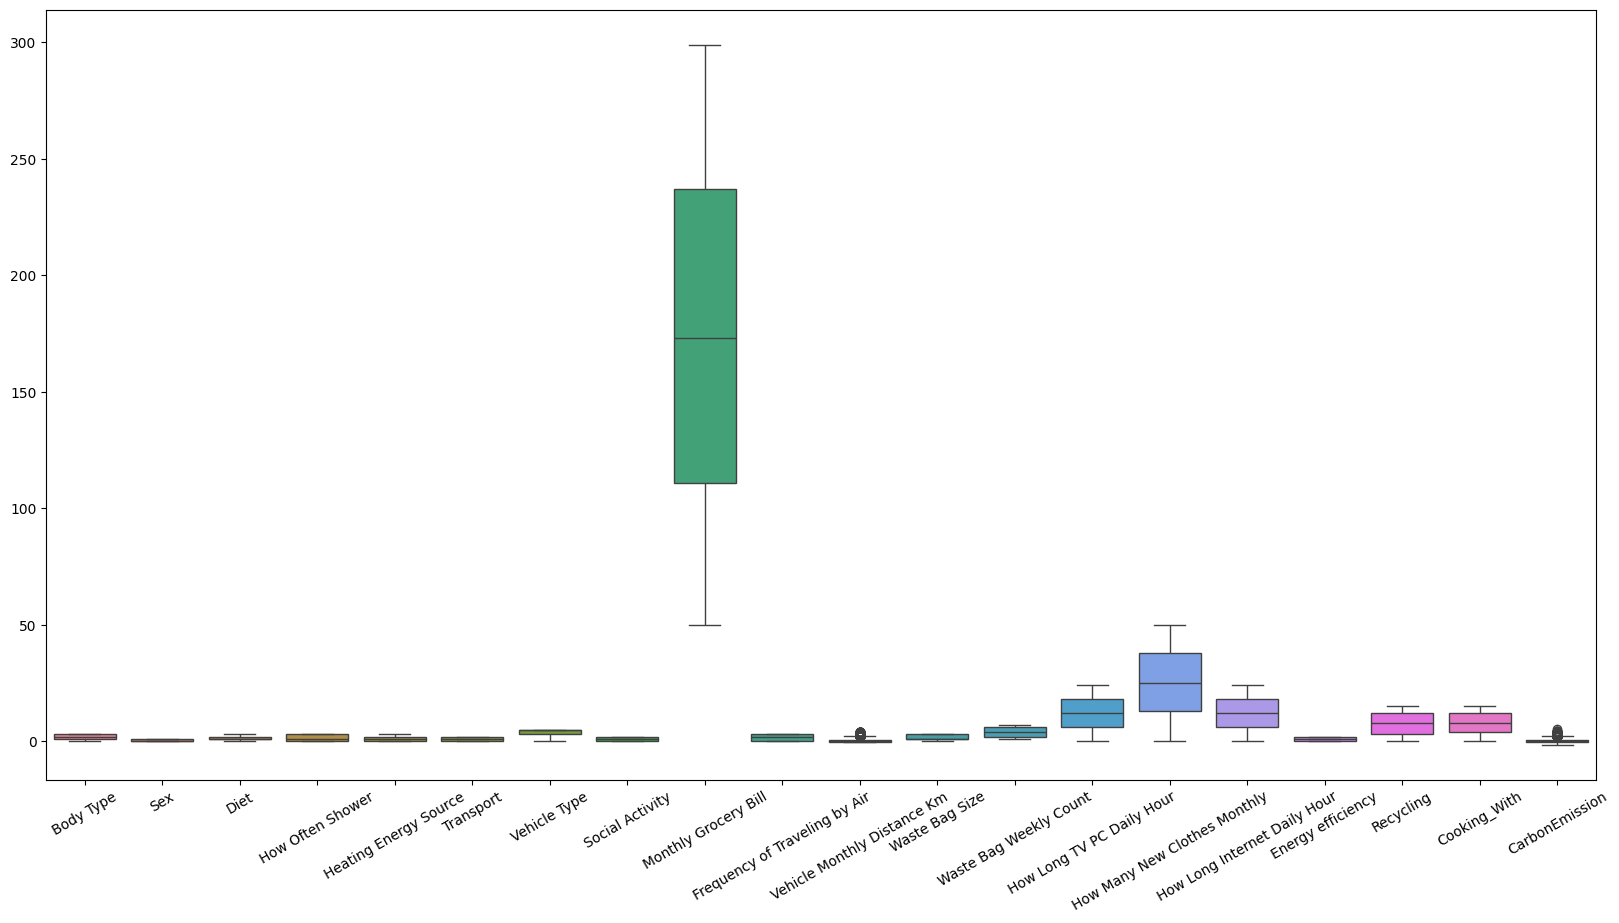

In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import RobustScaler

# Selecting the columns to be scaled
columns_to_scale = ['Vehicle Monthly Distance Km', 'CarbonEmission']

# Initializing the RobustScaler
scaler = RobustScaler()

# Fit and transform the selected columns
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data_scaled[columns_to_scale])

# Visualizing the boxplots of the scaled numerical columns
plt.figure(figsize=(20,10))
sns.boxplot(data=data_scaled[numerical_columns])

# Rotating x-axis labels for better readability
plt.xticks(rotation=30)

# Displaying the boxplots
plt.show()


We can see that RobutScaler has worked, and our data has successfully been scaled. RobustScaler is  invaluable for scaling data in the presence of outliers. It's resilient to extreme values, minimizing their impact during scaling. This method calculates the median and interquartile range instead of the mean and standard deviation, making it less sensitive to outliers. It's particularly useful in datasets where outliers are common or when standard scalers might produce skewed results. By preserving the overall distribution while reducing the influence of outliers, RobustScaler, thus, ensures more robust and reliable model performance across various datasets and enhances the interpretability of results, and well justifies its name.

# Model Training

## Train Test Split

In [12]:
# Importing necessary libraries for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Separating the target variable from the features
target = data['CarbonEmission']
train_data = data.drop(['CarbonEmission'], axis=1)

# Performing train-test split with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=42)

# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size: The proportion of the dataset to include in the test split (here, 20%)
# random_state: Seed used by the random number generator for reproducibility

The train-test split partitions the dataset into training and testing subsets, enabling model evaluation. The training set is used to train the model, while the test set assesses its performance. A typical split allocates 80% of the data to training and 20% to testing, ensuring adequate data for both phases. The random_state parameter ensures reproducibility, crucial for consistent results across multiple runs. This process enables robust model validation, helping assess its generalization to unseen data.

## Algorithmic Training


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Here we import the necessary libraries for calculating the evaluation metrics.

**Linear Regression**

In [16]:
from sklearn.linear_model import LinearRegression

# Initializing and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculating evaluation metrics
linear_regression_mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error
linear_regression_mae = mean_absolute_error(y_test, y_pred)  # Calculating Mean Absolute Error
linear_regression_r2 = r2_score(y_test, y_pred)  # Calculating R-squared score

# Printing the Performace Metrics
print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {linear_regression_mse}")
print(f"Mean Absolute Error (MAE): {linear_regression_mae}")
print(f"R-squared Score (R2): {linear_regression_r2}")


Linear Regression Metrics:
Mean Squared Error (MSE): 446792.94297699886
Mean Absolute Error (MAE): 533.423006319963
R-squared Score (R2): 0.5702708829800847


We begin by first training our dataset using the Linear Regression algorithm, which is a fundamental statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It works by fitting a linear equation to the observed data points, aiming to minimize the vertical distances between the observed and predicted values. Linear regression assumes a linear relationship between the input features and the target variable, making it suitable for problems where this assumption holds true. Despite its simplicity, linear regression can provide valuable insights into the underlying patterns in the data. Finally, we print the evaluation metrics for the trained model.

**Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Initializing the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor()

# Training the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculating evaluation metrics
decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)
decision_tree_mae = mean_absolute_error(y_test, y_pred_decision_tree)
decision_tree_r2 = r2_score(y_test, y_pred_decision_tree)

# Printing evaluation metrics
print("Decision Tree Regression Metrics:")
print(f"Mean Squared Error (MSE): {decision_tree_mse}")
print(f"Mean Absolute Error (MAE): {decision_tree_mae}")
print(f"R-squared Score (R2): {decision_tree_r2}")


Decision Tree Regression Metrics:
Mean Squared Error (MSE): 231183.472
Mean Absolute Error (MAE): 363.299
R-squared Score (R2): 0.7776458405313874


We proceed by training our dataset using the Decision Tree algorithm, a non-parametric supervised learning technique utilized for both classification and regression tasks. Decision trees function by recursively partitioning the input space into smaller regions, where each region represents a decision or prediction. These trees are constructed based on the impurity of the data at each node, aiming to maximize the homogeneity of the data within each leaf node. Decision trees are intuitive and easily interpretable, making them suitable for scenarios where transparency and explainability are paramount. However, they can be prone to overfitting, especially with complex datasets, necessitating techniques like pruning to mitigate this issue. Finally, we print the evaluation metrics for the trained model.

**Support Vector Machine**

In [19]:
from sklearn.svm import SVR

# Initializing the Support Vector Machine model with RBF kernel
svm_rbf_model = SVR(kernel='rbf')

# Training the Support Vector Machine model
svm_rbf_model.fit(X_train, y_train)

# Calculating predictions
y_pred_svm_rbf = svm_rbf_model.predict(X_test)

# Calculating evaluation metrics
svm_rbf_mse = mean_squared_error(y_test, y_pred_svm_rbf)
svm_rbf_mae = mean_absolute_error(y_test, y_pred_svm_rbf)
svm_rbf_r2 = r2_score(y_test, y_pred_svm_rbf)

# Printing evaluation metrics
print("Support Vector Machine with RBF Kernel Regression Metrics:")
print(f"Mean Squared Error (MSE): {svm_rbf_mse}")
print(f"Mean Absolute Error (MAE): {svm_rbf_mae}")
print(f"R-squared Score (R2): {svm_rbf_r2}")


Support Vector Machine with RBF Kernel Regression Metrics:
Mean Squared Error (MSE): 760439.4582332455
Mean Absolute Error (MAE): 666.5250047698996
R-squared Score (R2): 0.2686030921699264


Here, we train our dataset using the Support Vector Machine (SVM) Regressor, which is a powerful supervised learning algorithm used for regression tasks. It works by finding the hyperplane that best fits the data points while maximizing the margin between different classes. The Radial Basis Function (RBF) kernel in SVM is a popular choice for mapping input data into higher-dimensional space, where it becomes easier to find a hyperplane that separates the data points. This kernel is effective for handling non-linear relationships between input features and target variables by transforming them into a higher-dimensional feature space. Finally, we print the evaluation metrics for the trained model.

**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Training the Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Printing evaluation metrics for the Random Forest model
print("Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared Score (R2): {r2_rf}")

Random Forest Regression Metrics:
Mean Squared Error (MSE): 93860.77408460001
Mean Absolute Error (MAE): 229.49355
R-squared Score (R2): 0.9097239376668996


We now train the dataset using the Random Forest Regressor, which is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mean prediction of individual trees for regression tasks. By combining multiple decision trees, it reduces overfitting and provides more robust predictions. After the training process, we print the performance metrics for the model.

**K Nearest Neighbour**

In [87]:
from sklearn.neighbors import KNeighborsRegressor

# Training the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluating the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Printing evaluation metrics for the KNN model
print("K-Nearest Neighbors Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"R-squared Score (R2): {r2_knn}")


K-Nearest Neighbors Regression Metrics:
Mean Squared Error (MSE): 731520.8069200001
Mean Absolute Error (MAE): 662.4866
R-squared Score (R2): 0.29641728818529967


**XG Boost**

In [25]:
from xgboost import XGBRegressor

# Training the XGBoost Regressor model
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluating the XGBoost Regressor model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Printing evaluation metrics for the XGBoost Regressor model
print("XGBoost Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"R-squared Score (R2): {r2_xgb}")


XGBoost Regression Metrics:
Mean Squared Error (MSE): 29450.481480557763
Mean Absolute Error (MAE): 122.73236357116699
R-squared Score (R2): 0.9716742853677907


Finally, we train our dataset on the final algorithm - XGBoost Regressor, short for *Extreme Gradient Boosting*, which is a powerful ensemble learning technique that uses a gradient boosting framework. It iteratively builds multiple weak learners, typically decision trees, and combines them to create a strong predictive model. XGBoost excels in performance and efficiency due to its optimization techniques and parallelization capabilities, making it widely used in data science competitions and real-world applications. The performance metrics are printed after the model has been trained successfully.


**Voting Regressor**

In [31]:
from sklearn.ensemble import VotingRegressor

# Defining the individual models for the ensemble
linear_regression_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Defining the voting regressor with soft voting
voting_soft = VotingRegressor([('linear_regression', linear_regression_model),
                                ('random_forest', random_forest_model),
                                ('gradient_boosting', gradient_boosting_model)],
                                weights=[2, 1, 4]) # Tweaking model weights for better performance

# Defining the voting regressor with hard voting
voting_hard = VotingRegressor([('linear_regression', linear_regression_model),
                                ('random_forest', random_forest_model),
                                ('gradient_boosting', gradient_boosting_model)],
                                weights=[1, 1, 2])

# Training the voting regressor with soft voting
voting_soft.fit(X_train, y_train)

# Training the voting regressor with hard voting
voting_hard.fit(X_train, y_train)

# Making predictions
y_pred_soft = voting_soft.predict(X_test)
y_pred_hard = voting_hard.predict(X_test)

# Evaluating the voting regressor with soft voting
mse_soft = mean_squared_error(y_test, y_pred_soft)
mae_soft = mean_absolute_error(y_test, y_pred_soft)
r2_soft = r2_score(y_test, y_pred_soft)

print("Soft Voting Metrics:")
print(f"Mean Squared Error (MSE): {mse_soft}")
print(f"Mean Absolute Error (MAE): {mae_soft}")
print(f"R-squared Score (R2): {r2_soft}")

# Evaluating the voting regressor with hard voting
mse_hard = mean_squared_error(y_test, y_pred_hard)
mae_hard = mean_absolute_error(y_test, y_pred_hard)
r2_hard = r2_score(y_test, y_pred_hard)

print("\nHard Voting Metrics:")
print(f"Mean Squared Error (MSE): {mse_hard}")
print(f"Mean Absolute Error (MAE): {mae_hard}")
print(f"R-squared Score (R2): {r2_hard}")


Soft Voting Metrics:
Mean Squared Error (MSE): 94740.46462735279
Mean Absolute Error (MAE): 229.84995586771103
R-squared Score (R2): 0.9088778440879163

Hard Voting Metrics:
Mean Squared Error (MSE): 87530.99476016925
Mean Absolute Error (MAE): 220.22392540168366
R-squared Score (R2): 0.9158119713361301


We also train a Voting Regressor, by combining the predictions of Linear Regression, Random Forest, and Gradient Boosting Regressor. Our voting model demonstrates robustness and versatility. The ensemble leverages diverse algorithms to capture different aspects of the dataset, resulting in improved predictive performance. Soft voting provides probabilistic outputs, offering a smoother decision boundary, while hard voting gives discrete predictions based on a majority vote. This approach ensures resilience against overfitting and enhances the model's generalization ability.

# **Neural Network**

Now we take up yet another method for training our model. We set up a Neural Network. Our neural network is a feedforward neural network, also known as a multi-layer perceptron (MLP), where, information flows in one direction—from the input layer through one or more hidden layers to the output layer—without any cycles or loops. Each neuron in one layer is connected to every neuron in the next layer, and each connection has an associated weight that is adjusted during training. This architecture allows feedforward neural networks to model complex relationships between input and output data, making them well-suited for a wide range of tasks including regression (in our case) and classification.

In [49]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Defining the architecture of the neural network
model = Sequential()

# Adding layers to the model
model.add(Dense(256, activation='relu', input_dim=19))  # Adding input layer with 256 neurons and ReLU activation
model.add(Dense(512, activation='relu'))  # Adding hidden layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))  # Adding hidden layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))  # Adding hidden layer with 512 neurons and ReLU activation
model.add(Dense(1, activation='linear'))  # Adding output layer with 1 neuron for linear regression

# Displaying the summary of the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               5120      
                                                                 
 dense_36 (Dense)            (None, 512)               131584    
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 dense_38 (Dense)            (None, 512)               262656    
                                                                 
 dense_39 (Dense)            (None, 1)                 513       
                                                                 
Total params: 662529 (2.53 MB)
Trainable params: 662529 (2.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We have thus defined the neural network architecture with a sequential model from the TensorFlow Keras library. It consists of an input layer followed by three hidden layers and an output layer. The input layer has 19 neurons corresponding to the number of features in the dataset. The activation function used in the input and hidden layers is Rectified Linear Unit (ReLU), which effectively handles non-linearity in the data. The output layer has a single neuron, indicating a regression task, with a linear activation function. This architecture allows the model to learn complex patterns and relationships in the data, making it suitable for predicting the carbon emission based on user input very acccurately.

In [66]:
# Compiling the model with Adam optimizer, mean absolute error loss function, and mean absolute error metric
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Training the model on the training data for 128 epochs
model.fit(X_train, y_train, epochs=128)

# Making predictions on the test data
y_ann = model.predict(X_test)

Epoch 1/128
250/250 [==============================] - 1s 2ms/step - loss: 586.1781 - mean_absolute_error: 586.1781
Epoch 2/128
250/250 [==============================] - 0s 2ms/step - loss: 580.3969 - mean_absolute_error: 580.3969
Epoch 3/128
250/250 [==============================] - 0s 2ms/step - loss: 582.8553 - mean_absolute_error: 582.8553
Epoch 4/128
250/250 [==============================] - 0s 2ms/step - loss: 581.1218 - mean_absolute_error: 581.1218
Epoch 5/128
250/250 [==============================] - 0s 2ms/step - loss: 572.6056 - mean_absolute_error: 572.6056
Epoch 6/128
250/250 [==============================] - 0s 2ms/step - loss: 561.3685 - mean_absolute_error: 561.3685
Epoch 7/128
250/250 [==============================] - 1s 2ms/step - loss: 564.9521 - mean_absolute_error: 564.9521
Epoch 8/128
250/250 [==============================] - 1s 3ms/step - loss: 560.5715 - mean_absolute_error: 560.5715
Epoch 9/128
250/250 [==============================] - 1s 3ms/step - los

After configuring our model, we compile it using the Adam optimizer, selecting the mean absolute error as our loss function, and further monitoring the mean absolute error metric during training. Subsequently, we commence the training phase, iterating over our training data for 128 epochs. Once trained, we apply our model to the unseen test data, generating predictions for the target variable. Evaluating our model's performance, we compute the mean absolute error, quantifying the average absolute difference between the true and predicted target values. In the final stages of training, our model demonstrates a persistent pattern of reducing mean absolute error, suggesting ongoing refinement in its predictive capabilities. Despite minor fluctuations in loss, the mean absolute error converges around 354.11, indicating a consistent level of accuracy in predicting the target variable. This stability in performance over successive epochs signifies that our model has reached a plateau in learning, achieving a reliable level of accuracy in estimating the target variable.

In [74]:
# Calculating mean squared error (MSE) between the true and predicted values
mse_nn = mean_squared_error(y_test, y_ann)

# Calculating mean absolute error (MAE) between the true and predicted values
mae_nn = mean_absolute_error(y_test, y_ann)

# Calculating R-squared (R2) between the true and predicted values
r2_nn = r2_score(y_test, y_ann)

# Printing the mean squared error in a formatted manner
print(f"Mean Squared Error (MSE): {mse_nn:.2f}")

# Printing the mean absolute error in a formatted manner
print(f"Mean Absolute Error (MAE): {mae_nn:.2f}")

# Printing the R-squared score in a formatted manner
print(f"R-squared Score (R2): {r2_nn:.2f}")


Mean Squared Error (MSE): 265177.46
Mean Absolute Error (MAE): 354.11
R-squared Score (R2): 0.74


# Performance Analysis


In this part we display the performances of all our models in a tabulated format, to determine which model has performed the best.

In [88]:
from tabulate import tabulate

# Defining the performance metrics for each model
models_metrics = [
    ["Linear Regression", linear_regression_mse, linear_regression_mae, linear_regression_r2],
    ["Decision Tree", decision_tree_mse, decision_tree_mae, decision_tree_r2],
    ["Random Forest", mse_rf, mae_rf, r2_rf],
    ["Support Vector Machine (RBF Kernel)", svm_rbf_mse, svm_rbf_mae, svm_rbf_r2],
    ["K Nearest Neighbors", mse_knn, mae_knn, r2_knn],
    ["XGBoost Regressor", mse_xgb, mae_xgb, r2_xgb],
    ["Gradient Boosting Regressor", mse_hard, mae_hard, r2_hard],
    ["Neural Network", mse_nn, mae_nn, r2_nn]
]

# Defining the headers for the table
headers = ["Model", "Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared Score (R2)"]

# Printing the table
print(tabulate(models_metrics, headers=headers, tablefmt="grid"))

+-------------------------------------+----------------------------+-----------------------------+------------------------+
| Model                               |   Mean Squared Error (MSE) |   Mean Absolute Error (MAE) |   R-squared Score (R2) |
+=====================================+============================+=============================+========================+
| Linear Regression                   |                   446793   |                     533.423 |               0.570271 |
+-------------------------------------+----------------------------+-----------------------------+------------------------+
| Decision Tree                       |                   231183   |                     363.299 |               0.777646 |
+-------------------------------------+----------------------------+-----------------------------+------------------------+
| Random Forest                       |                    93860.8 |                     229.494 |               0.909724 |
+-------

The tabulated performance metrics of various models showcase their effectiveness in predicting carbon emissions.
Among the models, XGBoost Regressor exhibits the best performance with the lowest MSE of 29450.5 and MAE of 122.732,
along with the highest R-squared score of 0.971674. This suggests that XGBoost Regressor is the most suitable model
for accurately predicting carbon emissions based on the given dataset. We are going to export the model to implement it.

# Model Export

In [86]:
import pickle

# Save the trained XGBoost Regressor model to a file
with open("xgb_regressor_model.pkl", "wb") as file:
    pickle.dump(xgboost_model, file)


We have finally come to the end of this project. In the very last step, we export the XGBoost model as a pickle file to implement it into our web framework for calculating the carbon emissions.